# ANÁLISIS DE VARIABLES CATEGÓRICAS

C:\Users\villa\AppData\Local\Temp\ipykernel_21412\1529679844.py:13: DtypeWarning: Columns (16,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  matrimonios = pd.read_csv('matrimonios_limpio.csv')
C:\Users\villa\AppData\Local\Temp\ipykernel_21412\1529679844.py:14: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  divorcios = pd.read_csv('divorcios_limpio.csv')


VALORES FALTANTES EN MATRIMONIOS:
                             Variable  Total_Registros  Valores_Faltantes  \
4   Pueblo de Pertenencia de la Mujer           832242              79040   
3    Pueblo de Pertenencia del Hombre           832242              56270   
8             Escolaridad de la Mujer           832242              54994   
0            Departamento de Registro           832242              51756   
11         Departamento de Ocurrencia           832242              51450   
13   Area Geografica de la Ocurrencia           832242              47813   
7              Escolaridad del Hombre           832242              33385   
2                      Clase de Union           832242              13845   
5             Nacionalidad del Hombre           832242                  0   
1               Municipio de Registro           832242                  0   
9                Ocupacion del Hombre           832242                  0   
6            Nacionalidad de la Mujer     

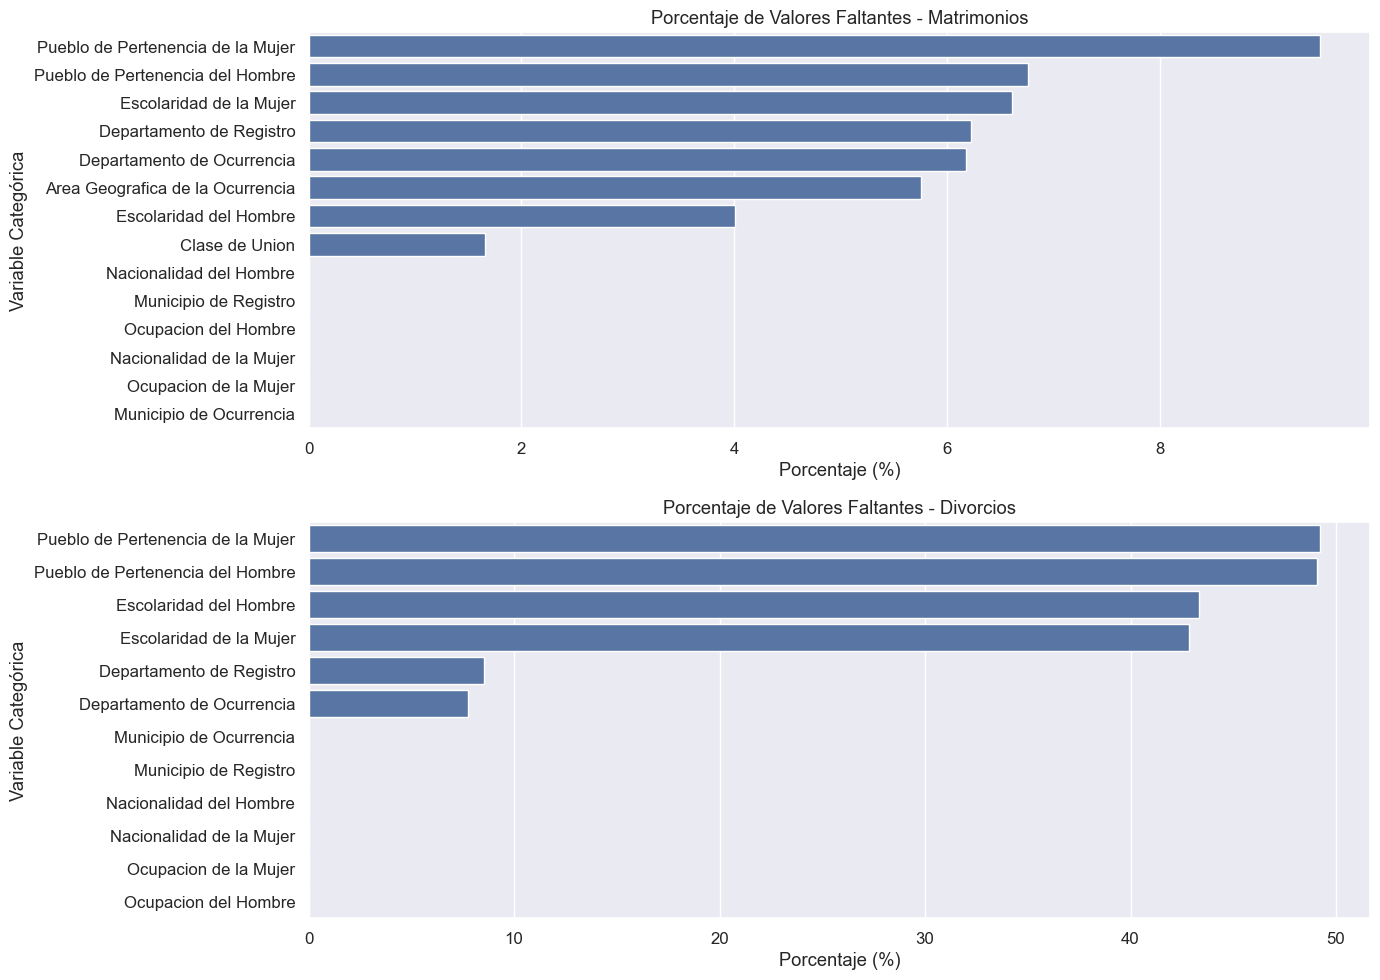

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar visualizaciones
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set(font_scale=1.1)

# Cargar los datos
matrimonios = pd.read_csv('matrimonios_limpio.csv')
divorcios = pd.read_csv('divorcios_limpio.csv')

# Definir variables categóricas para cada conjunto de datos
vars_cat_matrimonios = [
    'Departamento de Registro', 'Municipio de Registro', 'Clase de Union',
    'Pueblo de Pertenencia del Hombre', 'Pueblo de Pertenencia de la Mujer',
    'Nacionalidad del Hombre', 'Nacionalidad de la Mujer',
    'Escolaridad del Hombre', 'Escolaridad de la Mujer',
    'Ocupacion del Hombre', 'Ocupacion de la Mujer',
    'Departamento de Ocurrencia', 'Municipio de Ocurrencia',
    'Area Geografica de la Ocurrencia'
]

vars_cat_divorcios = [
    'Departamento de Registro', 'Municipio de Registro',
    'Departamento de Ocurrencia', 'Municipio de Ocurrencia',
    'Nacionalidad del Hombre', 'Nacionalidad de la Mujer',
    'Escolaridad del Hombre', 'Escolaridad de la Mujer',
    'Ocupacion del Hombre', 'Ocupacion de la Mujer',
    'Pueblo de Pertenencia del Hombre', 'Pueblo de Pertenencia de la Mujer'
]

# Función corregida para verificar valores faltantes
def verificar_faltantes(df, variables, valores_faltantes=[9, 999]):
    """
    Verifica y reporta valores faltantes en un dataframe
    """
    # Crear un DataFrame para almacenar resultados
    resultados = pd.DataFrame(columns=['Variable', 'Total_Registros', 'Valores_Faltantes', 'Porcentaje'])
    
    for var in variables:
        if var in df.columns:
            # Contar valores faltantes (9 y 999)
            missing = sum(df[var].isin(valores_faltantes))
            total = len(df)
            porcentaje = (missing / total) * 100
            
            # Agregar al DataFrame de resultados usando loc (reemplazo de append)
            resultados.loc[len(resultados)] = {
                'Variable': var,
                'Total_Registros': total,
                'Valores_Faltantes': missing,
                'Porcentaje': round(porcentaje, 2)
            }
    
    # Ordenar por porcentaje descendente
    resultados = resultados.sort_values(by='Porcentaje', ascending=False)
    return resultados

# Ejecutar análisis de valores faltantes
faltantes_matrimonios = verificar_faltantes(matrimonios, vars_cat_matrimonios)
faltantes_divorcios = verificar_faltantes(divorcios, vars_cat_divorcios)

# Mostrar resultados
print("VALORES FALTANTES EN MATRIMONIOS:")
print(faltantes_matrimonios)
print("\nVALORES FALTANTES EN DIVORCIOS:")
print(faltantes_divorcios)

# Visualizar valores faltantes con gráficos de barras
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
sns.barplot(x='Porcentaje', y='Variable', data=faltantes_matrimonios)
plt.title('Porcentaje de Valores Faltantes - Matrimonios')
plt.xlabel('Porcentaje (%)')
plt.ylabel('Variable Categórica')

plt.subplot(2, 1, 2)
sns.barplot(x='Porcentaje', y='Variable', data=faltantes_divorcios)
plt.title('Porcentaje de Valores Faltantes - Divorcios')
plt.xlabel('Porcentaje (%)')
plt.ylabel('Variable Categórica')

plt.tight_layout()
plt.savefig('./Gráficas/valores_faltantes.png')
plt.show()


--- ANÁLISIS DE MATRIMONIOS ---

Tabla de Frecuencias - Departamento de Registro de Matrimonios
   Departamento de Registro  Frecuencia  Porcentaje
0                 Guatemala      168961       20.30
1              Alta Verapaz       62216        7.48
2             Huehuetenango       58822        7.07
3                    Quiché       54336        6.53
4                San Marcos       53831        6.47
5            Quetzaltenango       51756        6.22
6             Chimaltenango       43522        5.23
7                 Escuintla       41283        4.96
8             Suchitepéquez       37793        4.54
9               Totonicapán       28824        3.46
10                    Otros      230898       27.75


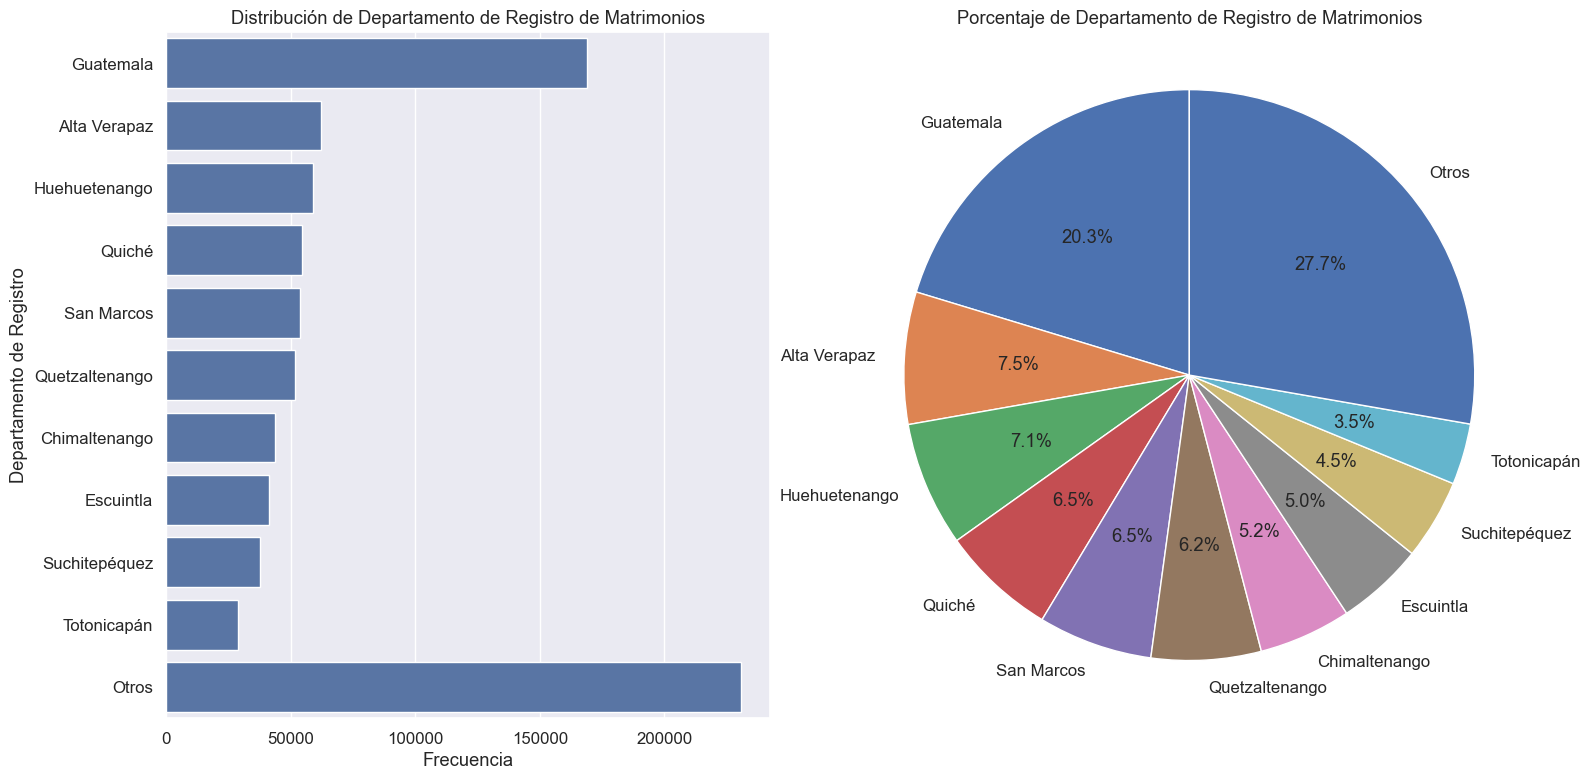


Tabla de Frecuencias - Pueblo de Pertenencia del Hombre
  Pueblo de Pertenencia del Hombre  Frecuencia  Porcentaje
0                   Mestizo/Ladino      457674       54.99
1                             Maya      301958       36.28
2                         Ignorado       56270        6.76
3                             Otro       15383        1.85
4                            Xinka         715        0.09
5                         Garífuna         242        0.03


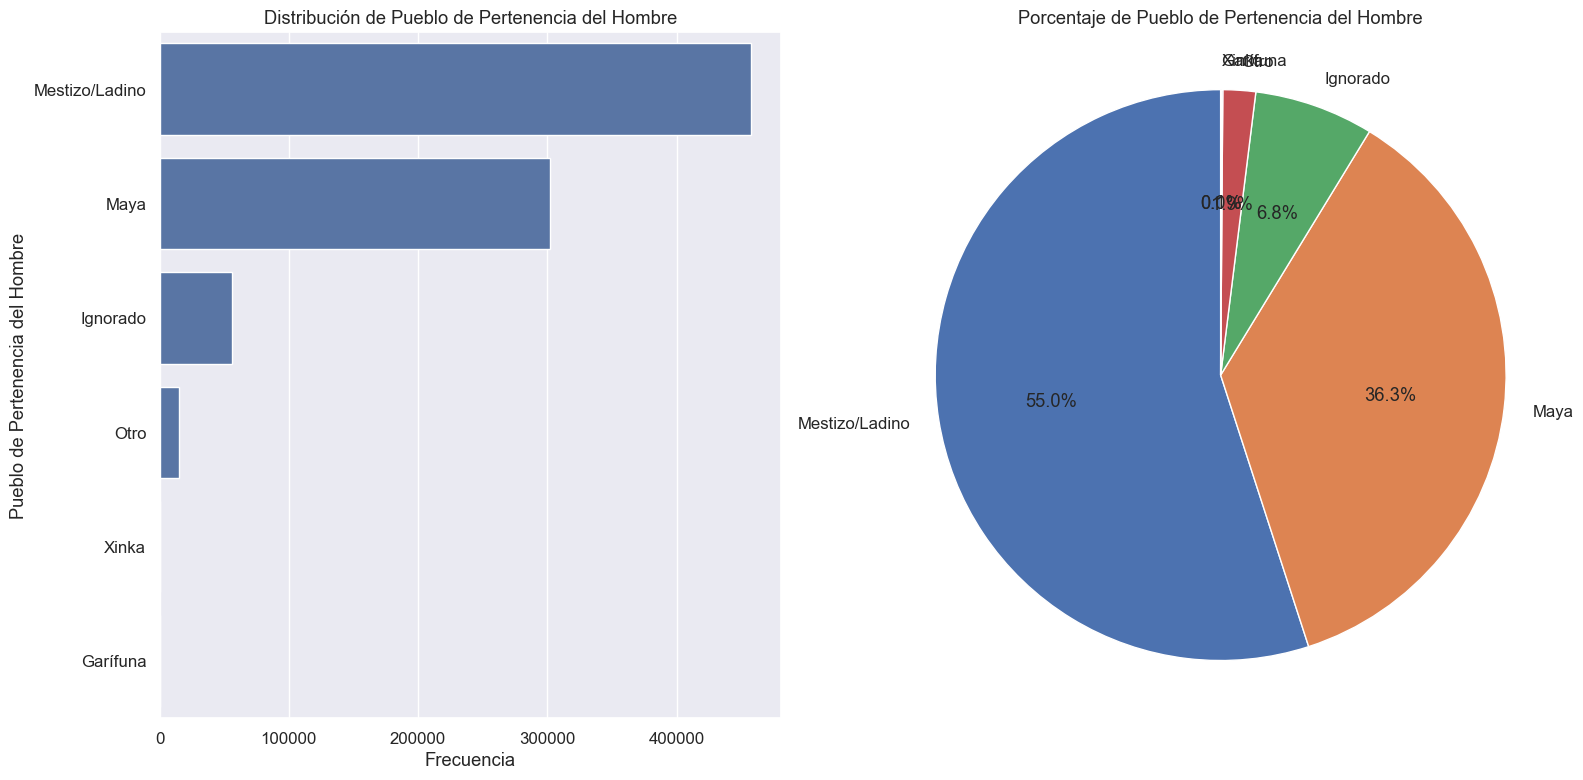


Tabla de Frecuencias - Nivel Educativo del Hombre
  Escolaridad del Hombre  Frecuencia  Porcentaje
0               Primaria      284089       34.14
1          Diversificado      236138       28.37
2                 Básico      157582       18.93
3                Ninguno       86799       10.43
4          Universitario       33579        4.03
5               Ignorado       33385        4.01
6              Postgrado         670        0.08


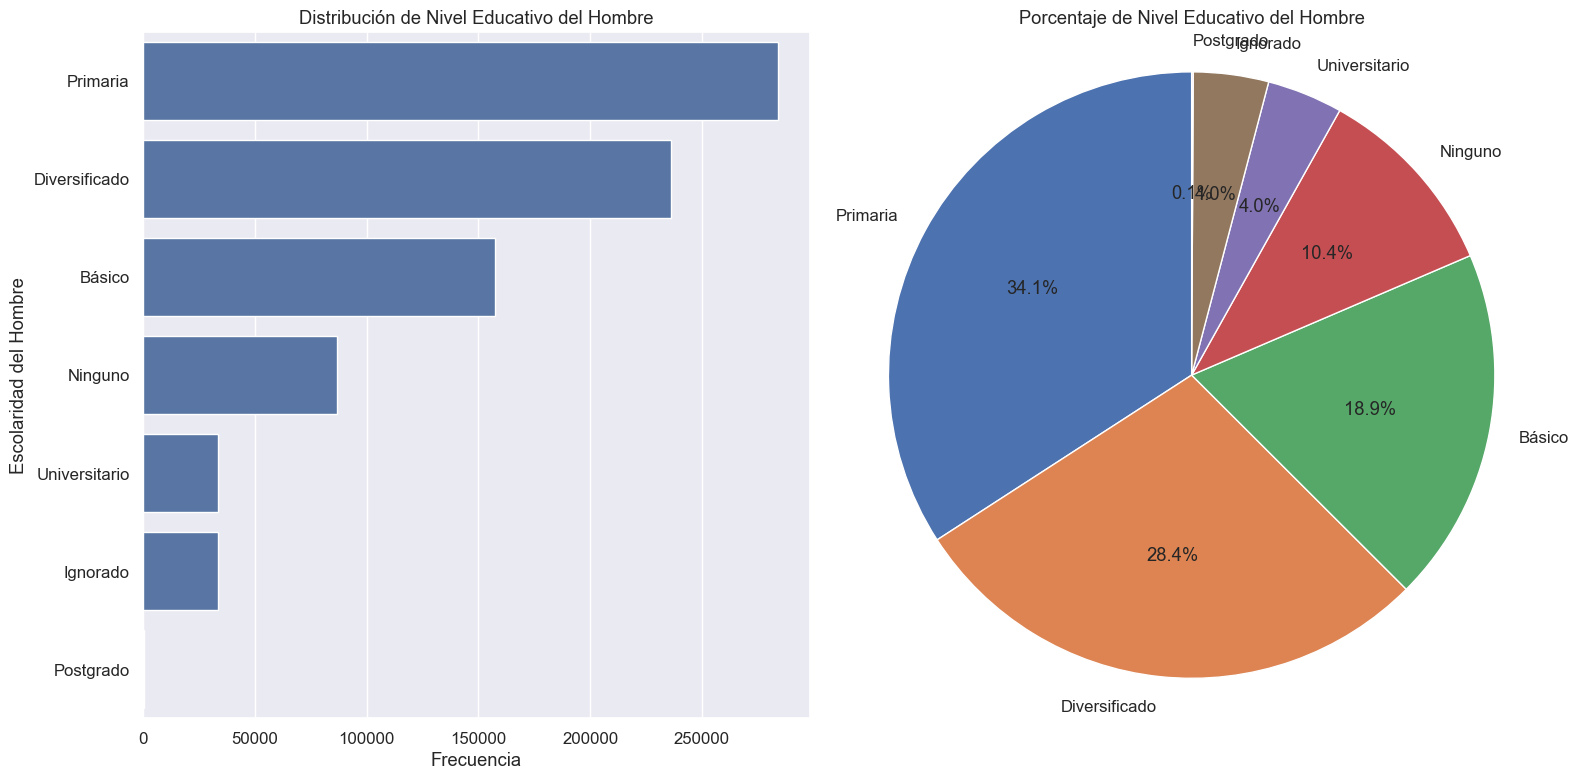


Tabla de Frecuencias - Nivel Educativo de la Mujer
  Escolaridad de la Mujer  Frecuencia  Porcentaje
0                Primaria      258497       31.06
1           Diversificado      229490       27.57
2                 Ninguno      131131       15.76
3                  Básico      128910       15.49
4                Ignorado       54994        6.61
5           Universitario       28609        3.44
6               Postgrado         611        0.07


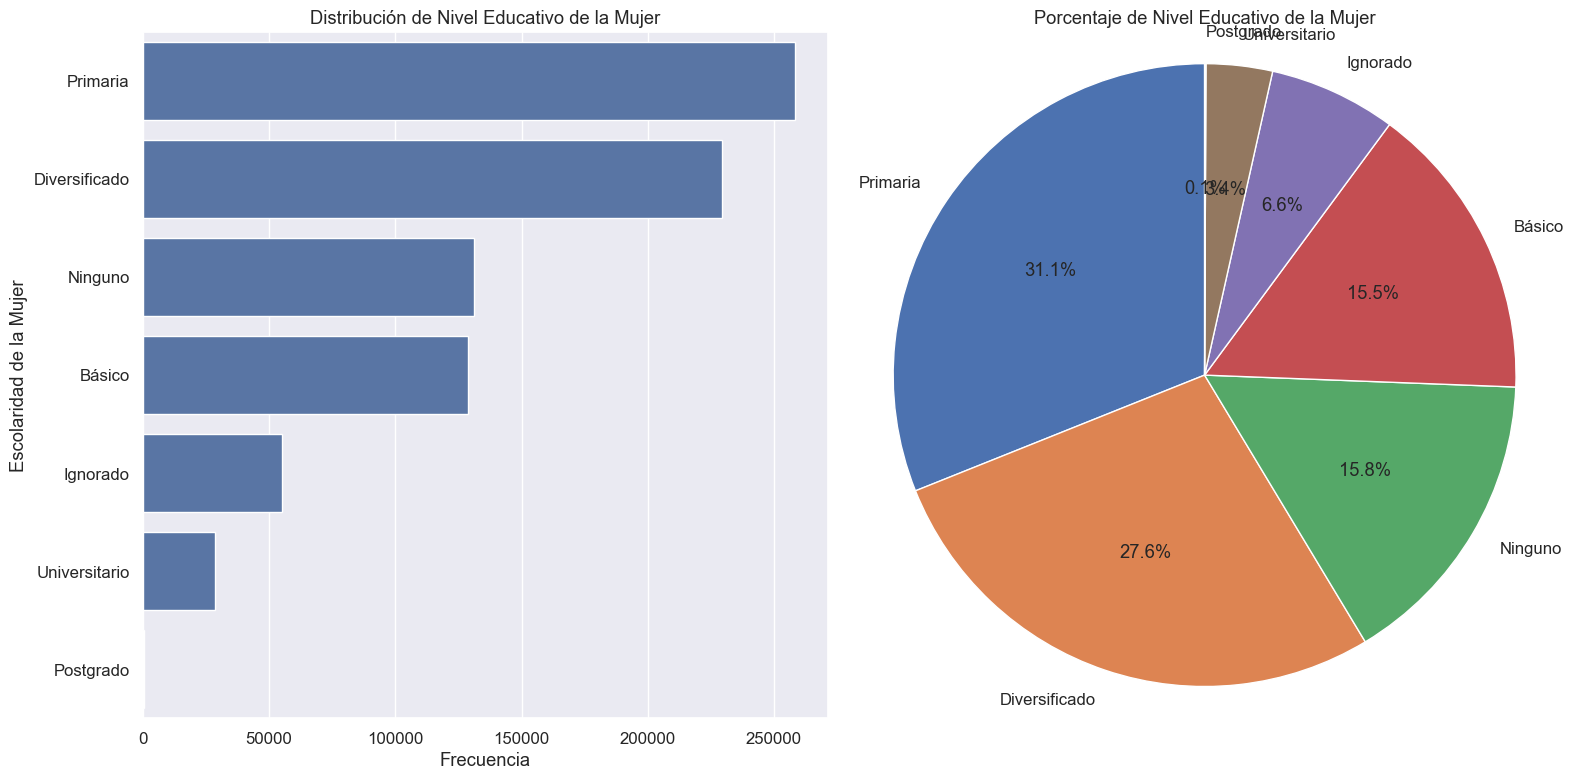


Tabla de Frecuencias - Área Geográfica de Matrimonios
  Area Geografica de la Ocurrencia  Frecuencia  Porcentaje
0                           Urbano      286747       75.34
1                         Ignorado       47813       12.56
2                            Rural       46066       12.10


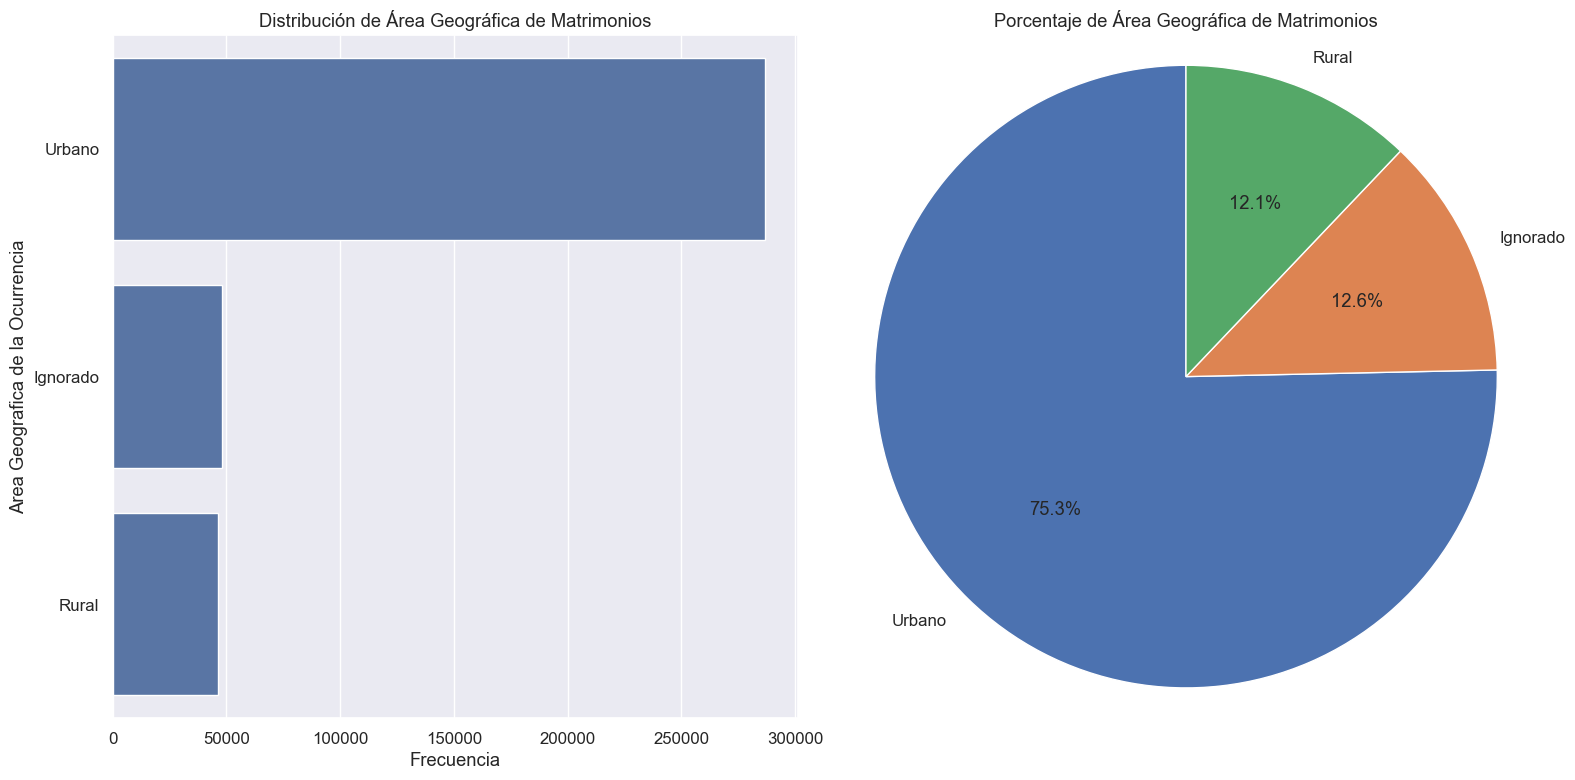


--- ANÁLISIS DE DIVORCIOS ---

Tabla de Frecuencias - Departamento de Registro de Divorcios
   Departamento de Registro  Frecuencia  Porcentaje
0                 Guatemala       29160       38.03
1            Quetzaltenango        6546        8.54
2                 Escuintla        3369        4.39
3                San Marcos        3071        4.01
4                   Jutiapa        2732        3.56
5             Suchitepéquez        2696        3.52
6             Huehuetenango        2627        3.43
7                    Izabal        2361        3.08
8                Retalhuleu        2316        3.02
9                     Petén        2225        2.90
10                    Otros       19566       25.51


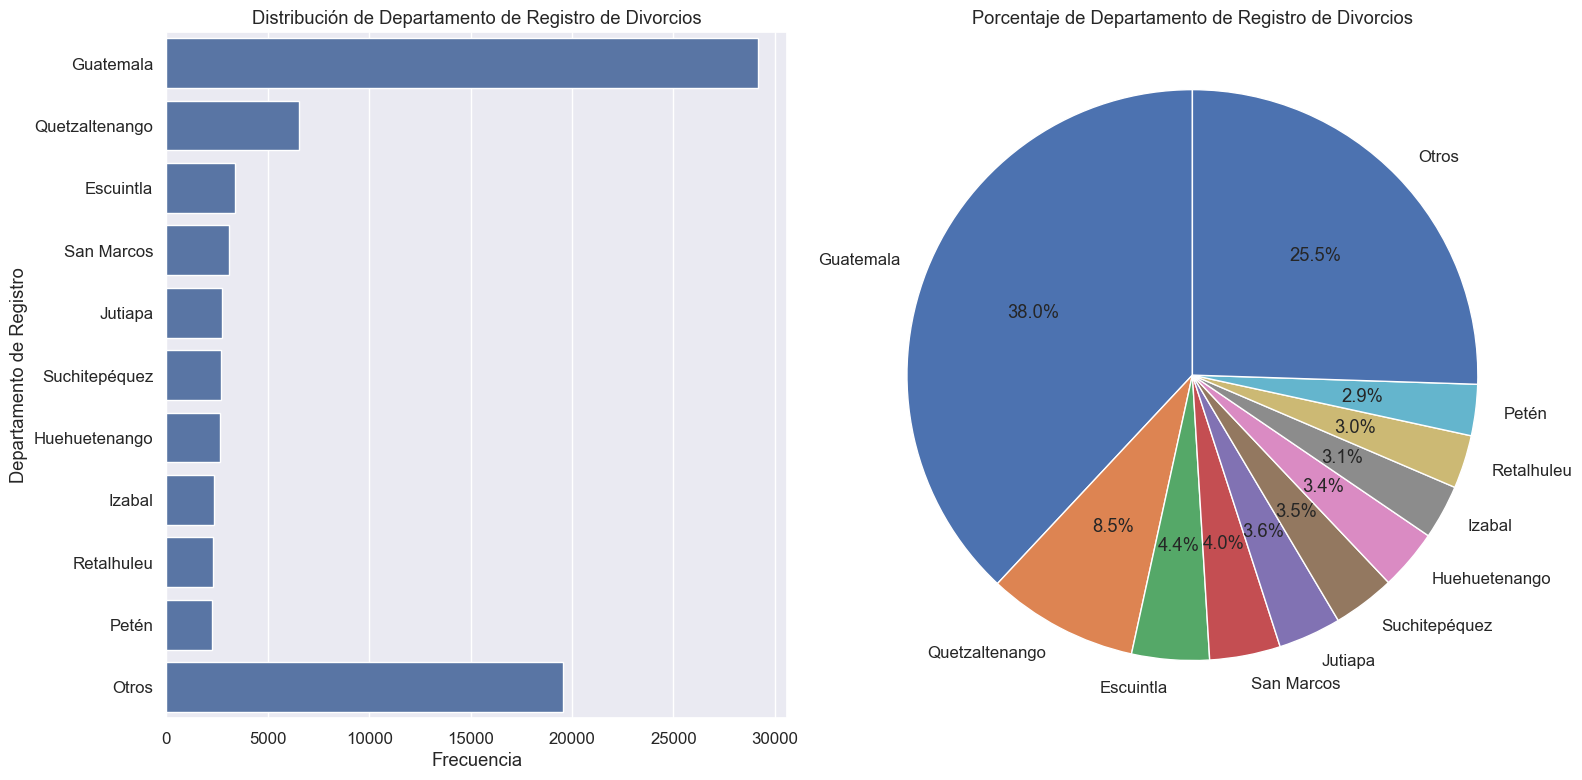


Tabla de Frecuencias - Pueblo de Pertenencia del Hombre
  Pueblo de Pertenencia del Hombre  Frecuencia  Porcentaje
0                         Ignorado       37606       49.05
1                   Mestizo/Ladino       32369       42.22
2                             Maya        6047        7.89
3                             Otro         609        0.79
4                         Garífuna          26        0.03
5                            Xinka          12        0.02


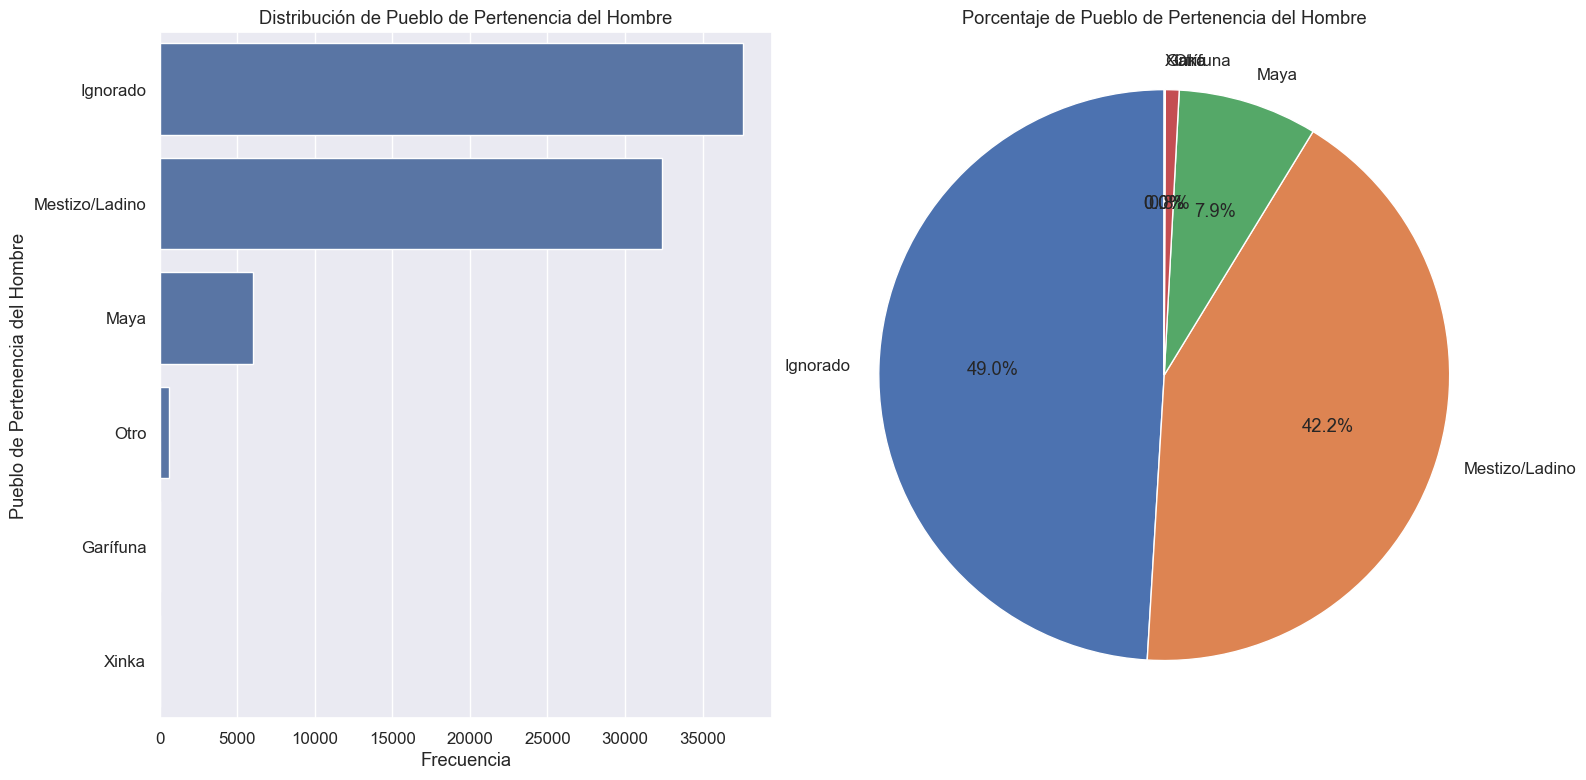


Tabla de Frecuencias - Nivel Educativo del Hombre
  Escolaridad del Hombre  Frecuencia  Porcentaje
0               Ignorado       33234       43.61
1          Diversificado       15539       20.39
2                Ninguno        9016       11.83
3               Primaria        7668       10.06
4                 Básico        6214        8.15
5          Universitario        4384        5.75
6              Postgrado         157        0.21


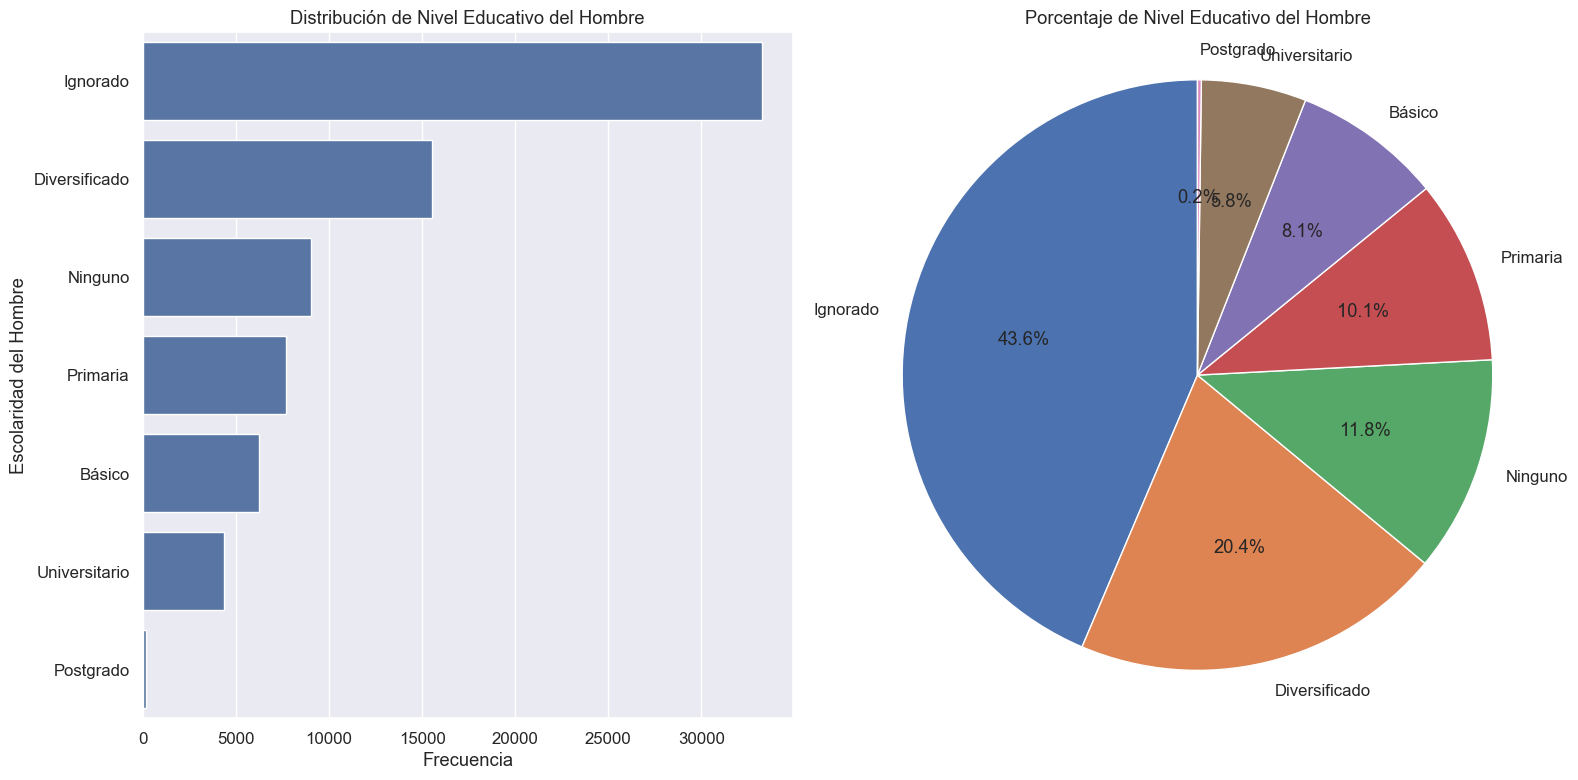


Tabla de Frecuencias - Nivel Educativo de la Mujer
  Escolaridad de la Mujer  Frecuencia  Porcentaje
0                Ignorado       32856       43.16
1           Diversificado       16034       21.06
2                 Ninguno        9371       12.31
3                Primaria        7355        9.66
4                  Básico        6155        8.09
5           Universitario        4247        5.58
6               Postgrado         109        0.14


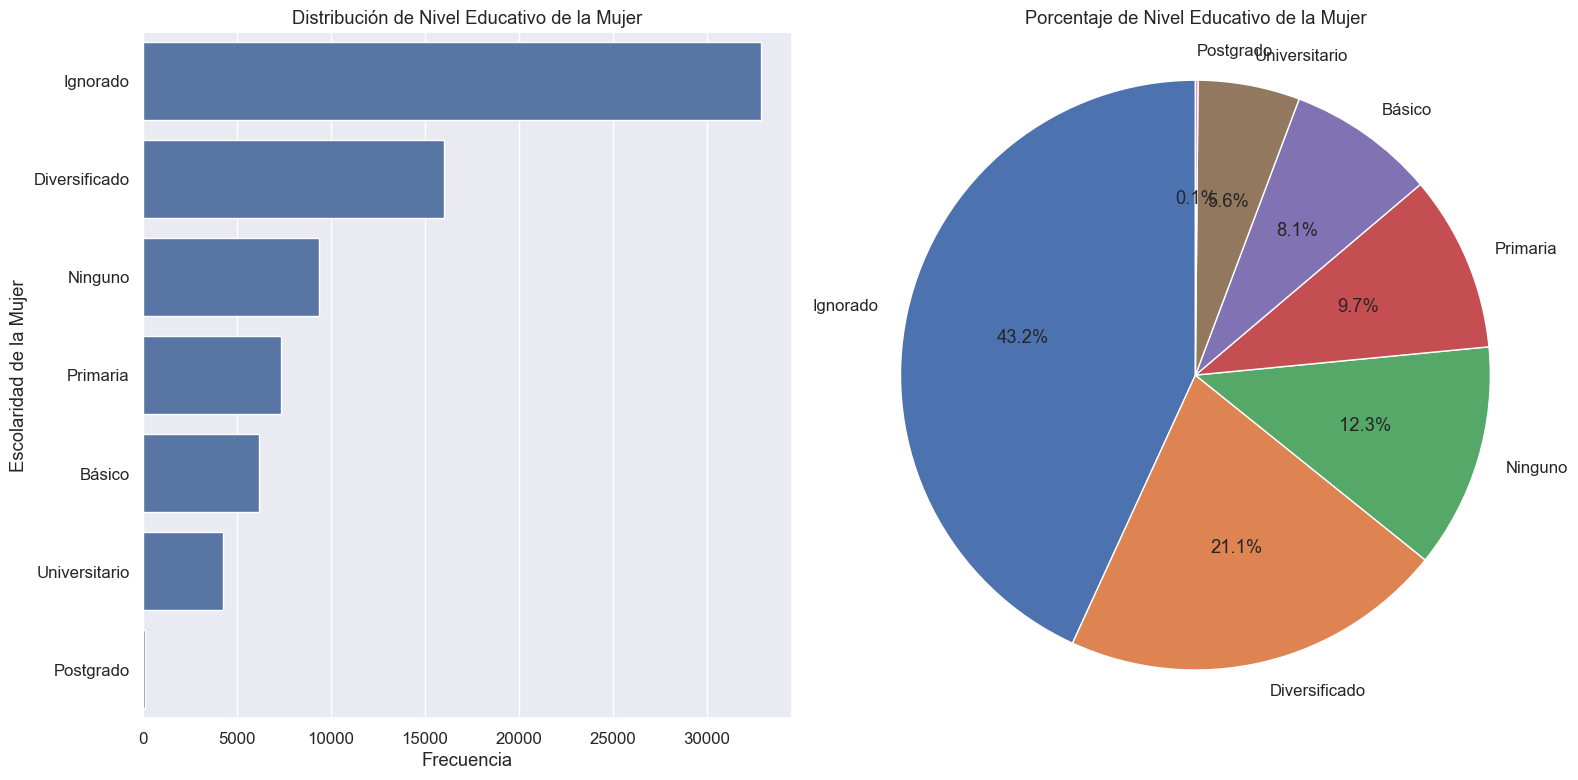

,Escolaridad de la Mujer,Frecuencia,Porcentaje
0,Ignorado,32856,43.16
1,Diversificado,16034,21.06
2,Ninguno,9371,12.31
3,Primaria,7355,9.66
4,Básico,6155,8.09
5,Universitario,4247,5.58
6,Postgrado,109,0.14


In [44]:
# Función para generar tablas de frecuencia y visualizaciones
# Función para generar tablas de frecuencia y visualizaciones
def analizar_frecuencias(df, variable, titulo, top_n=10):
    """
    Genera tablas de frecuencia y gráficos para una variable categórica
    """
    if variable not in df.columns:
        print(f"Variable {variable} no encontrada en el conjunto de datos")
        return
    
    # Crear tabla de frecuencias
    freq = df[variable].value_counts().reset_index()
    freq.columns = [variable, 'Frecuencia']
    freq['Porcentaje'] = (freq['Frecuencia'] / freq['Frecuencia'].sum() * 100).round(2)
    
    # Si hay demasiadas categorías, limitar a las top_n más frecuentes
    if len(freq) > top_n:
        otros = pd.DataFrame({
            variable: ['Otros'],
            'Frecuencia': [freq.iloc[top_n:]['Frecuencia'].sum()],
            'Porcentaje': [freq.iloc[top_n:]['Porcentaje'].sum()]
        })
        freq = pd.concat([freq.iloc[:top_n], otros], ignore_index=True)
    
    # Mostrar tabla de frecuencias
    print(f"\nTabla de Frecuencias - {titulo}")
    print(freq)
    
    # Crear visualizaciones
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Gráfico de barras
    sns.barplot(x='Frecuencia', y=variable, data=freq, ax=ax1)
    ax1.set_title(f'Distribución de {titulo}')
    ax1.set_xlabel('Frecuencia')
    ax1.set_ylabel(variable)
    
    # Gráfico circular
    ax2.pie(freq['Porcentaje'], labels=freq[variable], autopct='%1.1f%%', startangle=90)
    ax2.axis('equal')  # Para que el gráfico sea circular
    ax2.set_title(f'Porcentaje de {titulo}')
    
    plt.tight_layout()
    plt.savefig(f'./Gráficas/distribucion_{variable}.png')
    plt.show()
    
    return freq

# Ejemplo de uso para algunas variables categóricas de matrimonios
# Usando diccionario para mapear códigos a nombres de departamentos
dict_departamentos = {
    1: 'Guatemala', 2: 'El Progreso', 3: 'Sacatepéquez', 4: 'Chimaltenango',
    5: 'Escuintla', 6: 'Santa Rosa', 7: 'Sololá', 8: 'Totonicapán',
    9: 'Quetzaltenango', 10: 'Suchitepéquez', 11: 'Retalhuleu', 12: 'San Marcos',
    13: 'Huehuetenango', 14: 'Quiché', 15: 'Baja Verapaz', 16: 'Alta Verapaz',
    17: 'Petén', 18: 'Izabal', 19: 'Zacapa', 20: 'Chiquimula', 21: 'Jalapa',
    22: 'Jutiapa'
}

dict_pueblos = {
    1: 'Maya', 2: 'Garífuna', 3: 'Xinka', 4: 'Mestizo/Ladino', 5: 'Otro', 9: 'Ignorado'
}

dict_escolaridad = {
    1: 'Ninguno', 2: 'Primaria', 3: 'Básico', 4: 'Diversificado', 
    5: 'Universitario', 6: 'Postgrado', 9: 'Ignorado'
}

dict_area = {
    1: 'Urbano', 2: 'Rural', 9: 'Ignorado'
}

# Convertir códigos a nombres en los dataframes
for df in [matrimonios, divorcios]:
    if 'Departamento de Registro' in df.columns:
        df['Departamento de Registro'] = df['Departamento de Registro'].map(dict_departamentos)
    if 'Departamento de Ocurrencia' in df.columns:
        df['Departamento de Ocurrencia'] = df['Departamento de Ocurrencia'].map(dict_departamentos)
    if 'Pueblo de Pertenencia del Hombre' in df.columns:
        df['Pueblo de Pertenencia del Hombre'] = df['Pueblo de Pertenencia del Hombre'].map(dict_pueblos)
    if 'Pueblo de Pertenencia de la Mujer' in df.columns:
        df['Pueblo de Pertenencia de la Mujer'] = df['Pueblo de Pertenencia de la Mujer'].map(dict_pueblos)
    if 'Escolaridad del Hombre' in df.columns:
        df['Escolaridad del Hombre'] = df['Escolaridad del Hombre'].map(dict_escolaridad)
    if 'Escolaridad de la Mujer' in df.columns:
        df['Escolaridad de la Mujer'] = df['Escolaridad de la Mujer'].map(dict_escolaridad)
    if 'Area Geografica de la Ocurrencia' in df.columns:
        df['Area Geografica de la Ocurrencia'] = df['Area Geografica de la Ocurrencia'].map(dict_area)

# Analizar algunas variables categóricas clave
print("\n--- ANÁLISIS DE MATRIMONIOS ---")
analizar_frecuencias(matrimonios, 'Departamento de Registro', 'Departamento de Registro de Matrimonios')
analizar_frecuencias(matrimonios, 'Pueblo de Pertenencia del Hombre', 'Pueblo de Pertenencia del Hombre')
analizar_frecuencias(matrimonios, 'Escolaridad del Hombre', 'Nivel Educativo del Hombre')
analizar_frecuencias(matrimonios, 'Escolaridad de la Mujer', 'Nivel Educativo de la Mujer')
analizar_frecuencias(matrimonios, 'Area Geografica de la Ocurrencia', 'Área Geográfica de Matrimonios')

print("\n--- ANÁLISIS DE DIVORCIOS ---")
analizar_frecuencias(divorcios, 'Departamento de Registro', 'Departamento de Registro de Divorcios')
analizar_frecuencias(divorcios, 'Pueblo de Pertenencia del Hombre', 'Pueblo de Pertenencia del Hombre')
analizar_frecuencias(divorcios, 'Escolaridad del Hombre', 'Nivel Educativo del Hombre')
analizar_frecuencias(divorcios, 'Escolaridad de la Mujer', 'Nivel Educativo de la Mujer')


DISTRIBUCIÓN GEOGRÁFICA DE MATRIMONIOS Y DIVORCIOS POR DEPARTAMENTO
      Departamento  Matrimonios  Divorcios  Ratio_Divorcio_Matrimonio
6        Guatemala       168961      29160                      17.26
0     Alta Verapaz        62216       1556                       2.50
7    Huehuetenango        58822       2627                       4.47
13          Quiché        54336       2124                       3.91
16      San Marcos        53831       3071                       5.70
12  Quetzaltenango        51756       6546                      12.65
2    Chimaltenango        43522       1720                       3.95
5        Escuintla        41283       3369                       8.16
19   Suchitepéquez        37793       2696                       7.13
20     Totonicapán        28824       1210                       4.20
11           Petén        28604       2225                       7.78
10         Jutiapa        26588       2732                      10.28
15    Sacatepéquez   

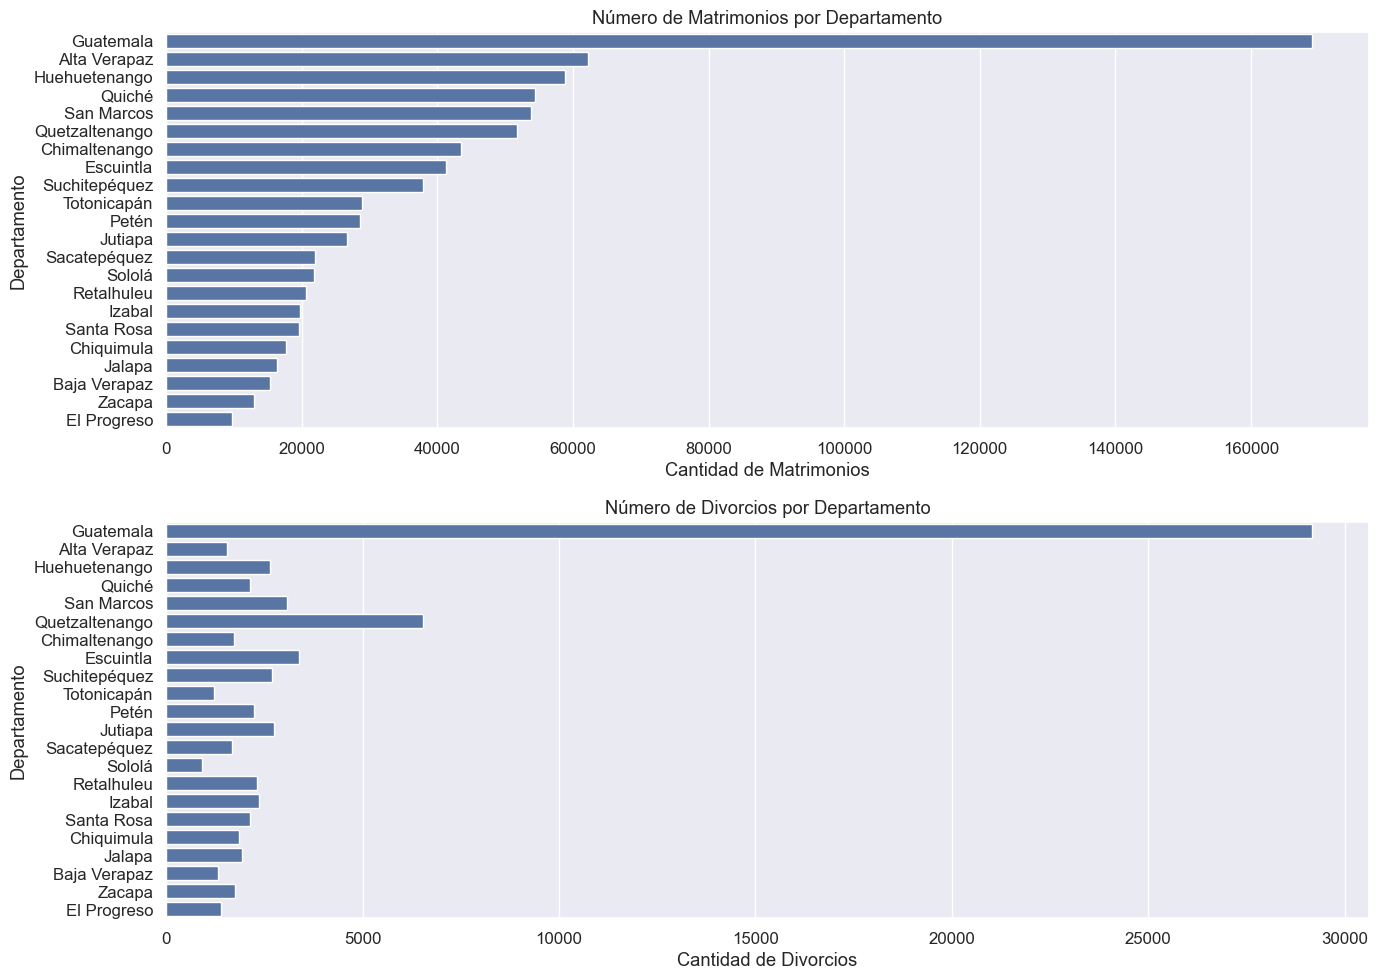

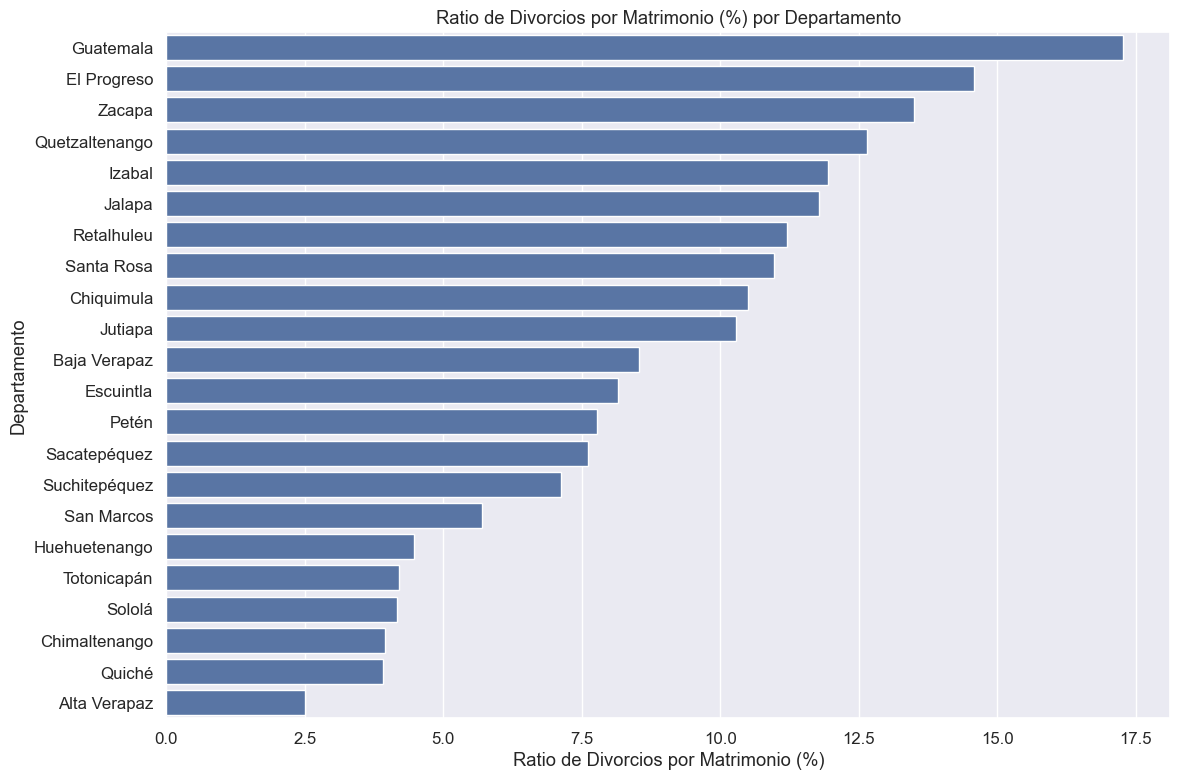


COMPARACIÓN URBANO-RURAL PARA Escolaridad del Hombre
  Escolaridad del Hombre  Frecuencia_Urbano  Porcentaje_Urbano  \
0                 Básico              49027              17.10   
1          Diversificado              78457              27.36   
2               Ignorado              10338               3.61   
3                Ninguno              35115              12.25   
4              Postgrado                113               0.04   
5               Primaria              99220              34.60   
6          Universitario              14477               5.05   

   Frecuencia_Rural  Porcentaje_Rural  
0              8416             18.27  
1             13838             30.04  
2              1997              4.34  
3              4505              9.78  
4                15              0.03  
5             15277             33.16  
6              2018              4.38  


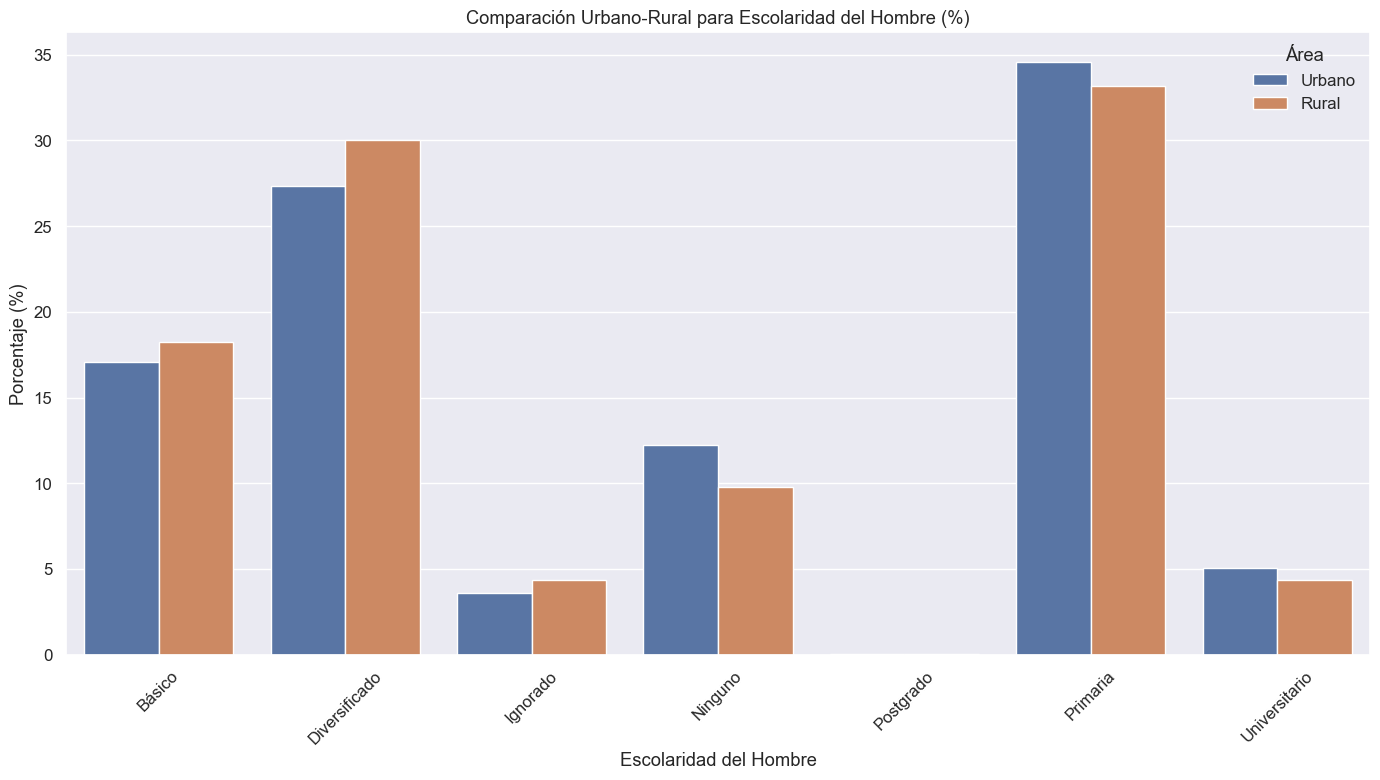


COMPARACIÓN URBANO-RURAL PARA Escolaridad de la Mujer
  Escolaridad de la Mujer  Frecuencia_Urbano  Porcentaje_Urbano  \
0                  Básico              39605              13.81   
1           Diversificado              76448              26.66   
2                Ignorado              17774               6.20   
3                 Ninguno              55935              19.51   
4               Postgrado                 75               0.03   
5                Primaria              84716              29.54   
6           Universitario              12194               4.25   

   Frecuencia_Rural  Porcentaje_Rural  
0              7044             15.29  
1             13415             29.12  
2              3564              7.74  
3              7221             15.68  
4                 9              0.02  
5             13111             28.46  
6              1702              3.69  


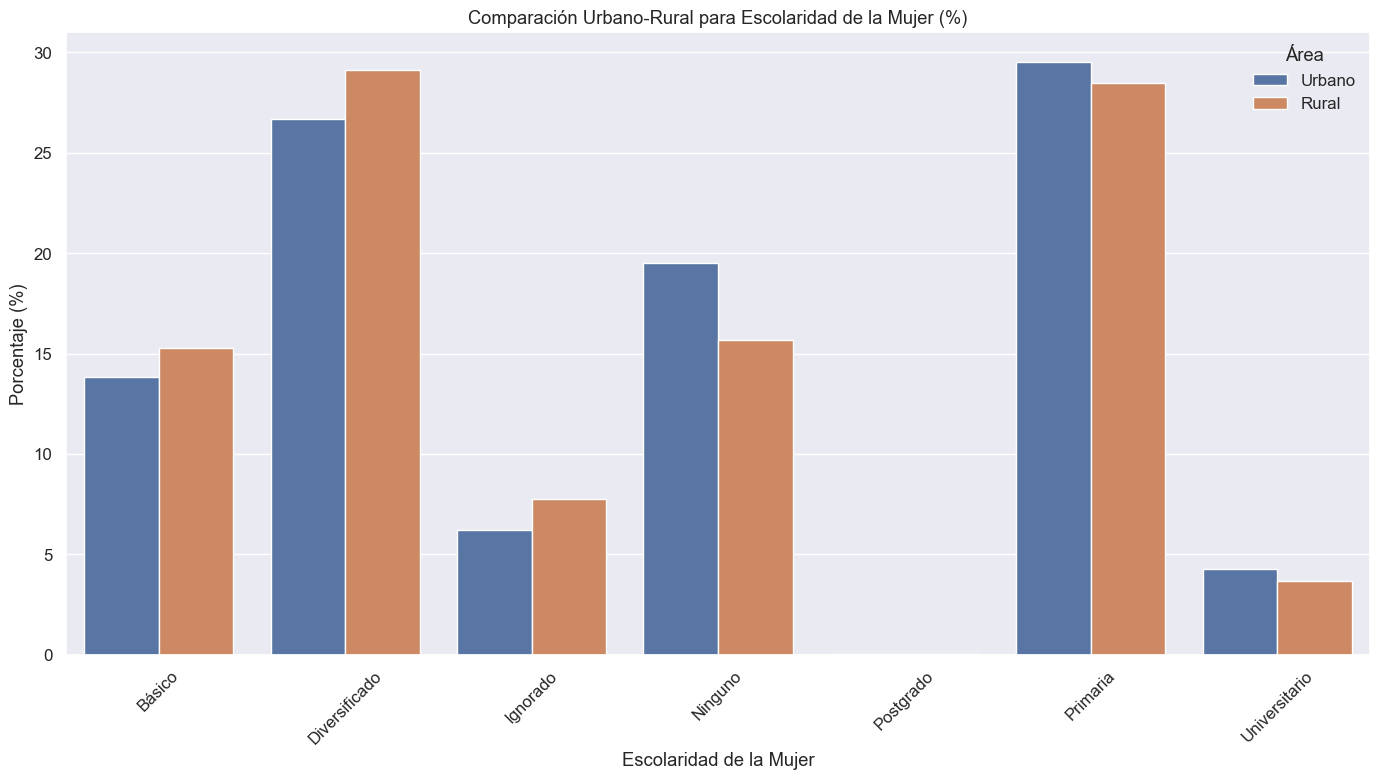


COMPARACIÓN URBANO-RURAL PARA Pueblo de Pertenencia del Hombre
  Pueblo de Pertenencia del Hombre  Frecuencia_Urbano  Porcentaje_Urbano  \
0                         Garífuna                107               0.04   
1                         Ignorado              16402               5.72   
2                             Maya             102571              35.77   
3                   Mestizo/Ladino             165010              57.55   
4                             Otro               2572               0.90   
5                            Xinka                 85               0.03   

   Frecuencia_Rural  Porcentaje_Rural  
0                 8              0.02  
1              2880              6.25  
2             19574             42.49  
3             22996             49.92  
4               604              1.31  
5                 4              0.01  


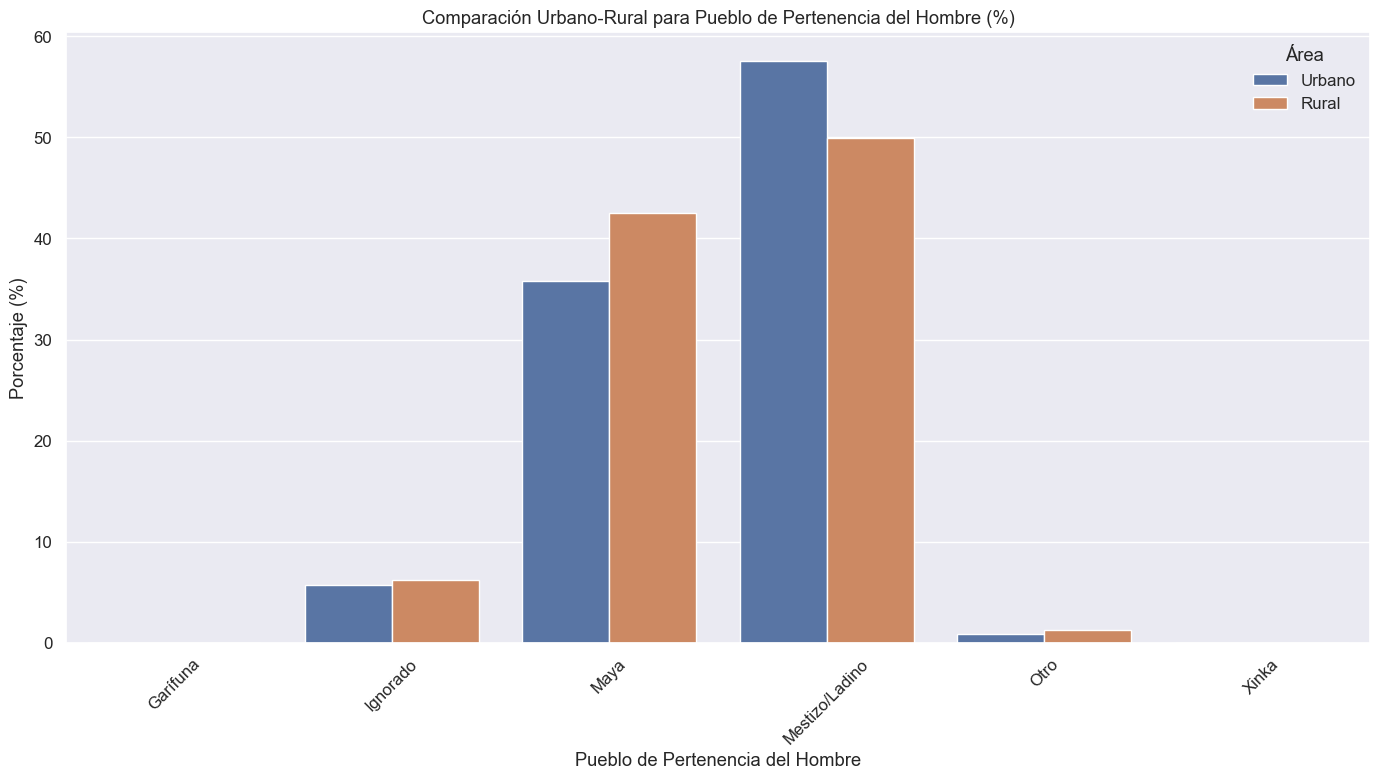

,Pueblo de Pertenencia del Hombre,Frecuencia_Urbano,Porcentaje_Urbano,Frecuencia_Rural,Porcentaje_Rural
0,Garífuna,107,0.04,8,0.02
1,Ignorado,16402,5.72,2880,6.25
2,Maya,102571,35.77,19574,42.49
3,Mestizo/Ladino,165010,57.55,22996,49.92
4,Otro,2572,0.90,604,1.31
5,Xinka,85,0.03,4,0.01


In [45]:
# Función para análisis geográfico (distribución por departamento)
def analizar_distribucion_geografica(df_matrimonios, df_divorcios):
    """
    Analiza la distribución geográfica de matrimonios y divorcios por departamento
    """
    # Contar matrimonios por departamento
    mat_por_depto = df_matrimonios['Departamento de Registro'].value_counts().reset_index()
    mat_por_depto.columns = ['Departamento', 'Matrimonios']
    
    # Contar divorcios por departamento
    div_por_depto = df_divorcios['Departamento de Registro'].value_counts().reset_index()
    div_por_depto.columns = ['Departamento', 'Divorcios']
    
    # Unir ambos dataframes
    distribución_geografica = pd.merge(mat_por_depto, div_por_depto, on='Departamento', how='outer').fillna(0)
    
    # Calcular ratio de divorcios por matrimonio
    distribución_geografica['Ratio_Divorcio_Matrimonio'] = (distribución_geografica['Divorcios'] / 
                                                          distribución_geografica['Matrimonios'] * 100).round(2)
    
    # Ordenar por número de matrimonios
    distribución_geografica = distribución_geografica.sort_values(by='Matrimonios', ascending=False)
    
    # Mostrar resultados
    print("\nDISTRIBUCIÓN GEOGRÁFICA DE MATRIMONIOS Y DIVORCIOS POR DEPARTAMENTO")
    print(distribución_geografica)
    
    # Visualizar matrimonios y divorcios por departamento
    plt.figure(figsize=(14, 10))
    
    # Gráfico de barras para matrimonios
    plt.subplot(2, 1, 1)
    sns.barplot(x='Matrimonios', y='Departamento', data=distribución_geografica)
    plt.title('Número de Matrimonios por Departamento')
    plt.xlabel('Cantidad de Matrimonios')
    plt.ylabel('Departamento')
    
    # Gráfico de barras para divorcios
    plt.subplot(2, 1, 2)
    sns.barplot(x='Divorcios', y='Departamento', data=distribución_geografica)
    plt.title('Número de Divorcios por Departamento')
    plt.xlabel('Cantidad de Divorcios')
    plt.ylabel('Departamento')
    
    plt.tight_layout()
    plt.savefig('./Gráficas/distribucion_geografica.png')
    plt.show()
    
    # Comparativa de ratio divorcio/matrimonio por departamento
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Ratio_Divorcio_Matrimonio', y='Departamento', 
                data=distribución_geografica.sort_values(by='Ratio_Divorcio_Matrimonio', ascending=False))
    plt.title('Ratio de Divorcios por Matrimonio (%) por Departamento')
    plt.xlabel('Ratio de Divorcios por Matrimonio (%)')
    plt.ylabel('Departamento')
    plt.tight_layout()
    plt.savefig('./Gráficas/ratio_divorcio_matrimonio.png')
    plt.show()
    
    return distribución_geografica

# Comparar distribuciones urbanas vs. rurales
def comparar_urbano_rural(df, variable):
    """
    Compara distribuciones de una variable categórica entre áreas urbanas y rurales
    """
    if 'Area Geografica de la Ocurrencia' not in df.columns or variable not in df.columns:
        print("Variables necesarias no encontradas en el conjunto de datos")
        return
    
    # Filtrar datos para áreas urbanas y rurales (excluyendo valores ignorados)
    urbano = df[df['Area Geografica de la Ocurrencia'] == 'Urbano']
    rural = df[df['Area Geografica de la Ocurrencia'] == 'Rural']
    
    # Contar frecuencias para la variable seleccionada en cada área
    urbano_freq = urbano[variable].value_counts().reset_index()
    urbano_freq.columns = [variable, 'Frecuencia_Urbano']
    urbano_freq['Porcentaje_Urbano'] = (urbano_freq['Frecuencia_Urbano'] / urbano_freq['Frecuencia_Urbano'].sum() * 100).round(2)
    
    rural_freq = rural[variable].value_counts().reset_index()
    rural_freq.columns = [variable, 'Frecuencia_Rural']
    rural_freq['Porcentaje_Rural'] = (rural_freq['Frecuencia_Rural'] / rural_freq['Frecuencia_Rural'].sum() * 100).round(2)
    
    # Unir los resultados
    comparacion = pd.merge(urbano_freq, rural_freq, on=variable, how='outer').fillna(0)
    
    # Mostrar resultados
    print(f"\nCOMPARACIÓN URBANO-RURAL PARA {variable}")
    print(comparacion)
    
    # Visualizar comparación
    plt.figure(figsize=(14, 8))
    
    # Crear un dataframe para visualización con seaborn
    data_viz = []
    for _, row in comparacion.iterrows():
        data_viz.append({'Categoría': row[variable], 'Porcentaje': row['Porcentaje_Urbano'], 'Área': 'Urbano'})
        data_viz.append({'Categoría': row[variable], 'Porcentaje': row['Porcentaje_Rural'], 'Área': 'Rural'})
    
    data_viz = pd.DataFrame(data_viz)
    
    # Gráfico de barras agrupadas
    sns.barplot(x='Categoría', y='Porcentaje', hue='Área', data=data_viz)
    plt.title(f'Comparación Urbano-Rural para {variable} (%)')
    plt.xlabel(variable)
    plt.ylabel('Porcentaje (%)')
    plt.xticks(rotation=45)
    plt.legend(title='Área')
    
    plt.tight_layout()
    plt.savefig(f'./Gráficas/comparacion_urbano_rural_{variable}.png')
    plt.show()
    
    return comparacion

# Ejecutar análisis geográfico
distribucion_geo = analizar_distribucion_geografica(matrimonios, divorcios)

# Comparar algunas variables categóricas entre áreas urbanas y rurales (solo para matrimonios)
comparar_urbano_rural(matrimonios, 'Escolaridad del Hombre')
comparar_urbano_rural(matrimonios, 'Escolaridad de la Mujer')
comparar_urbano_rural(matrimonios, 'Pueblo de Pertenencia del Hombre')

C:\Users\villa\AppData\Local\Temp\ipykernel_21412\1890151485.py:1: DtypeWarning: Columns (16,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  matrimonios = pd.read_csv('matrimonios_limpio.csv')
C:\Users\villa\AppData\Local\Temp\ipykernel_21412\1890151485.py:2: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  divorcios = pd.read_csv('divorcios_limpio.csv')



--- ANÁLISIS DE MATRIMONIOS ---

Tabla de Frecuencias - Departamento de Registro (Matrimonios)
   Departamento de Registro  Frecuencia  Porcentaje
0                 Guatemala      168961       20.30
1              Alta Verapaz       62216        7.48
2             Huehuetenango       58822        7.07
3                    Quiché       54336        6.53
4                San Marcos       53831        6.47
5            Quetzaltenango       51756        6.22
6             Chimaltenango       43522        5.23
7                 Escuintla       41283        4.96
8             Suchitepéquez       37793        4.54
9               Totonicapán       28824        3.46
10                    Otros      230898       27.75


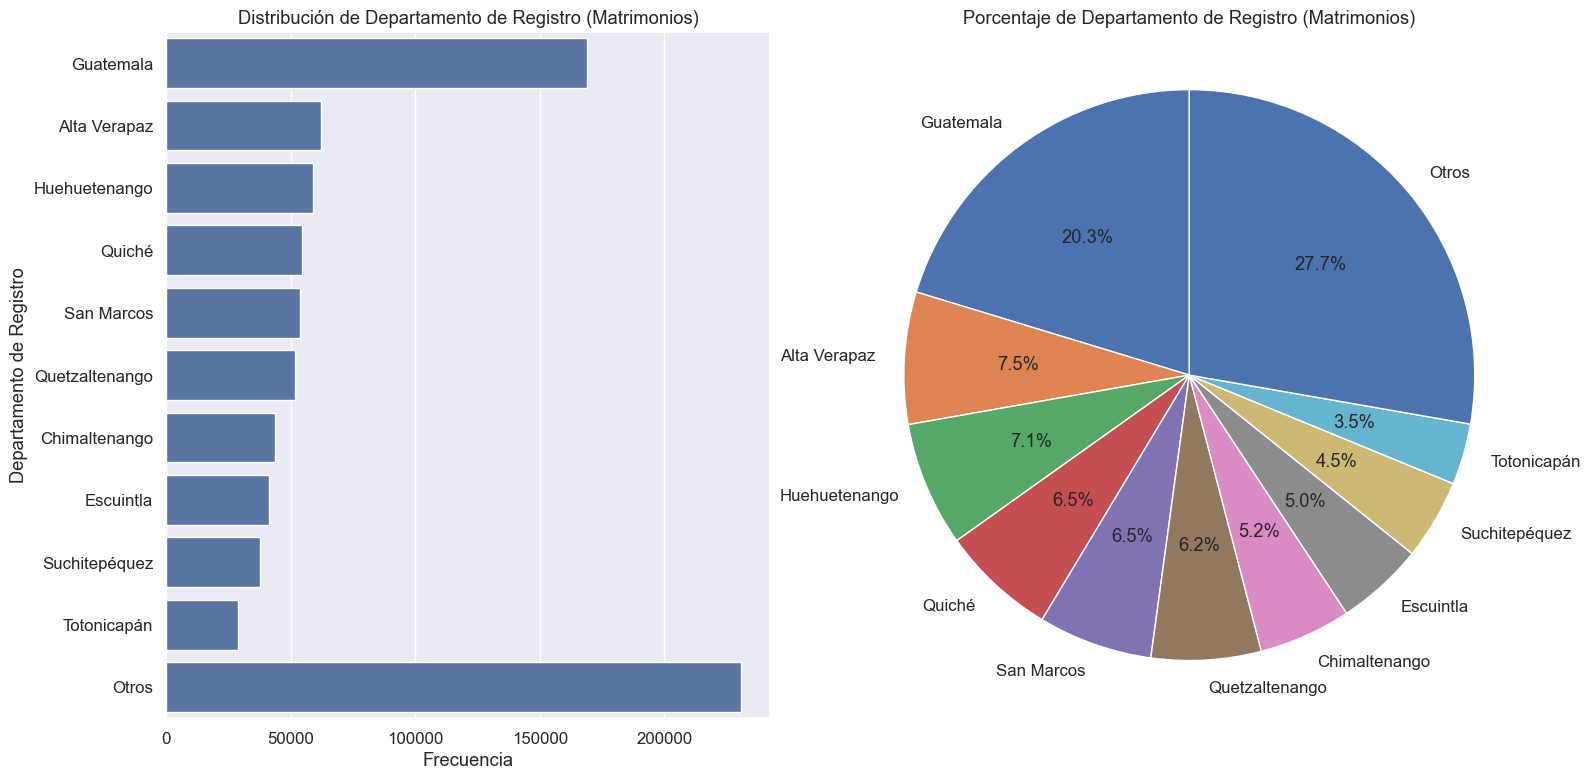


Tabla de Frecuencias - Pueblo de Pertenencia del Hombre (Matrimonios)
  Pueblo de Pertenencia del Hombre  Frecuencia  Porcentaje
0                   Mestizo/Ladino      457674       54.99
1                             Maya      301958       36.28
2                         Ignorado       56270        6.76
3                             Otro       15383        1.85
4                            Xinka         715        0.09
5                         Garífuna         242        0.03


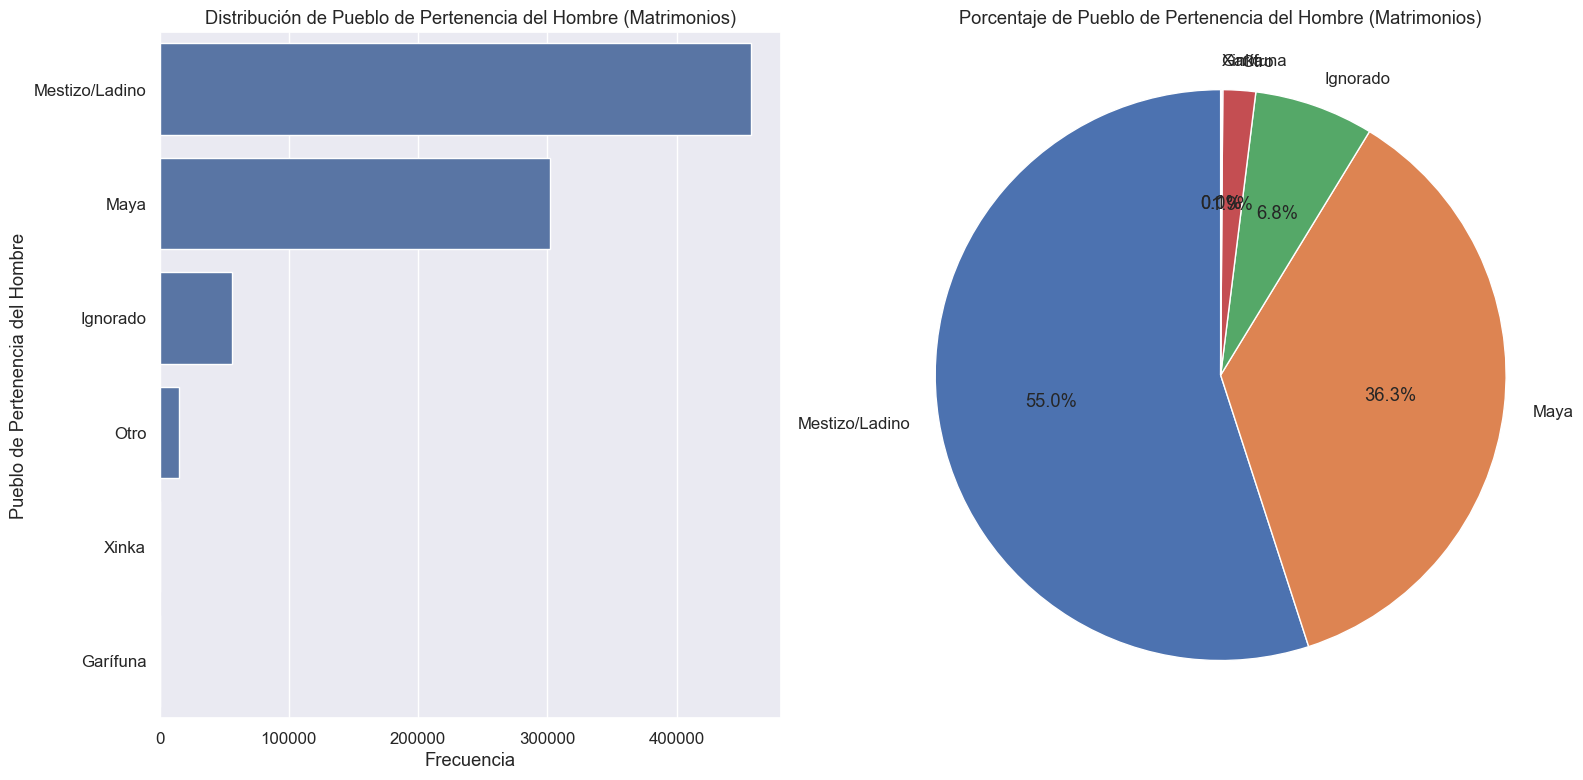


Tabla de Frecuencias - Nivel Educativo del Hombre (Matrimonios)
  Escolaridad del Hombre  Frecuencia  Porcentaje
0               Primaria      284089       34.14
1          Diversificado      236138       28.37
2                 Básico      157582       18.93
3                Ninguno       86799       10.43
4          Universitario       33579        4.03
5               Ignorado       33385        4.01
6              Postgrado         670        0.08


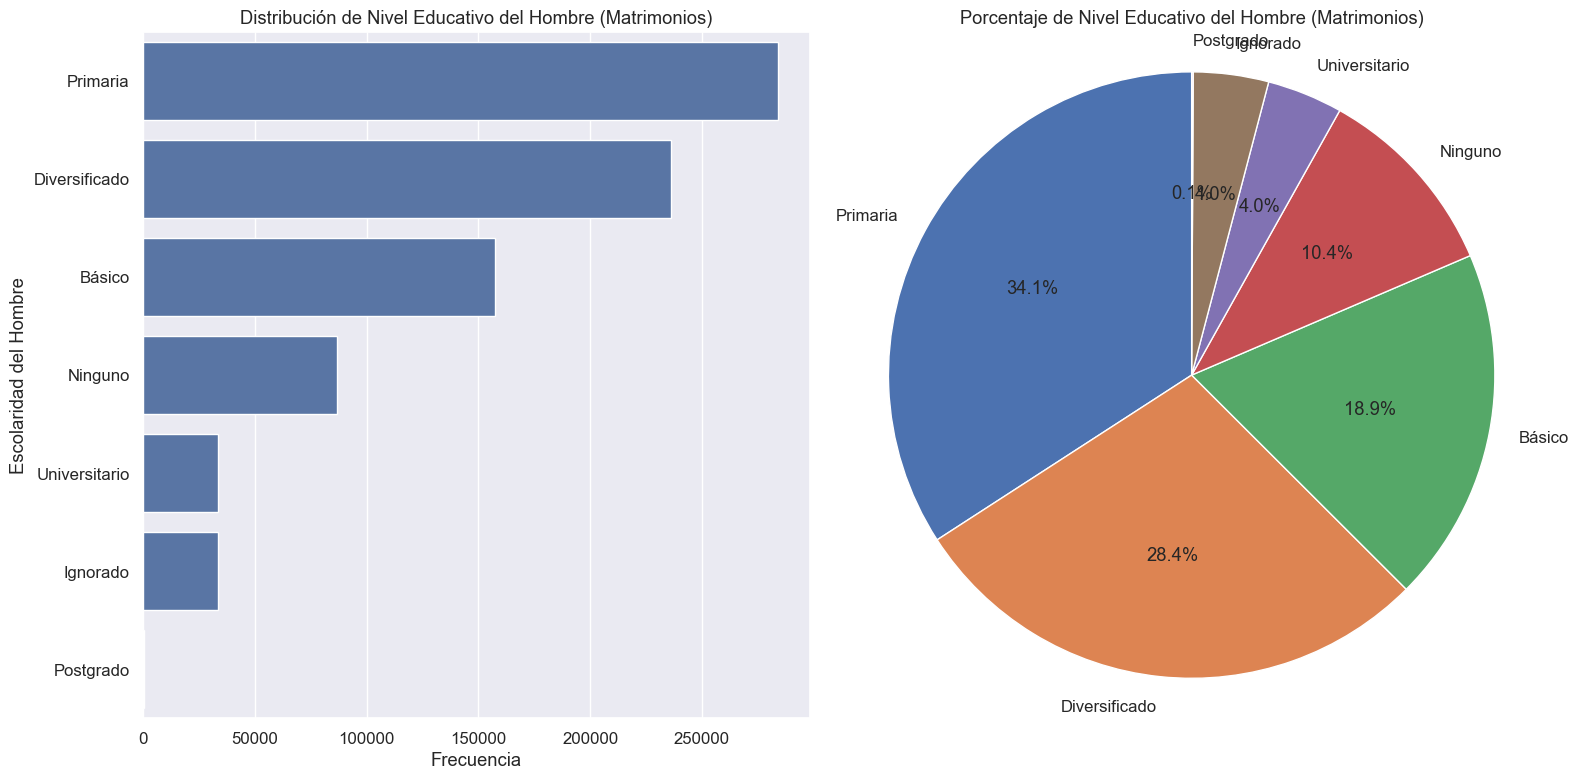


Tabla de Frecuencias - Nivel Educativo de la Mujer (Matrimonios)
  Escolaridad de la Mujer  Frecuencia  Porcentaje
0                Primaria      258497       31.06
1           Diversificado      229490       27.57
2                 Ninguno      131131       15.76
3                  Básico      128910       15.49
4                Ignorado       54994        6.61
5           Universitario       28609        3.44
6               Postgrado         611        0.07


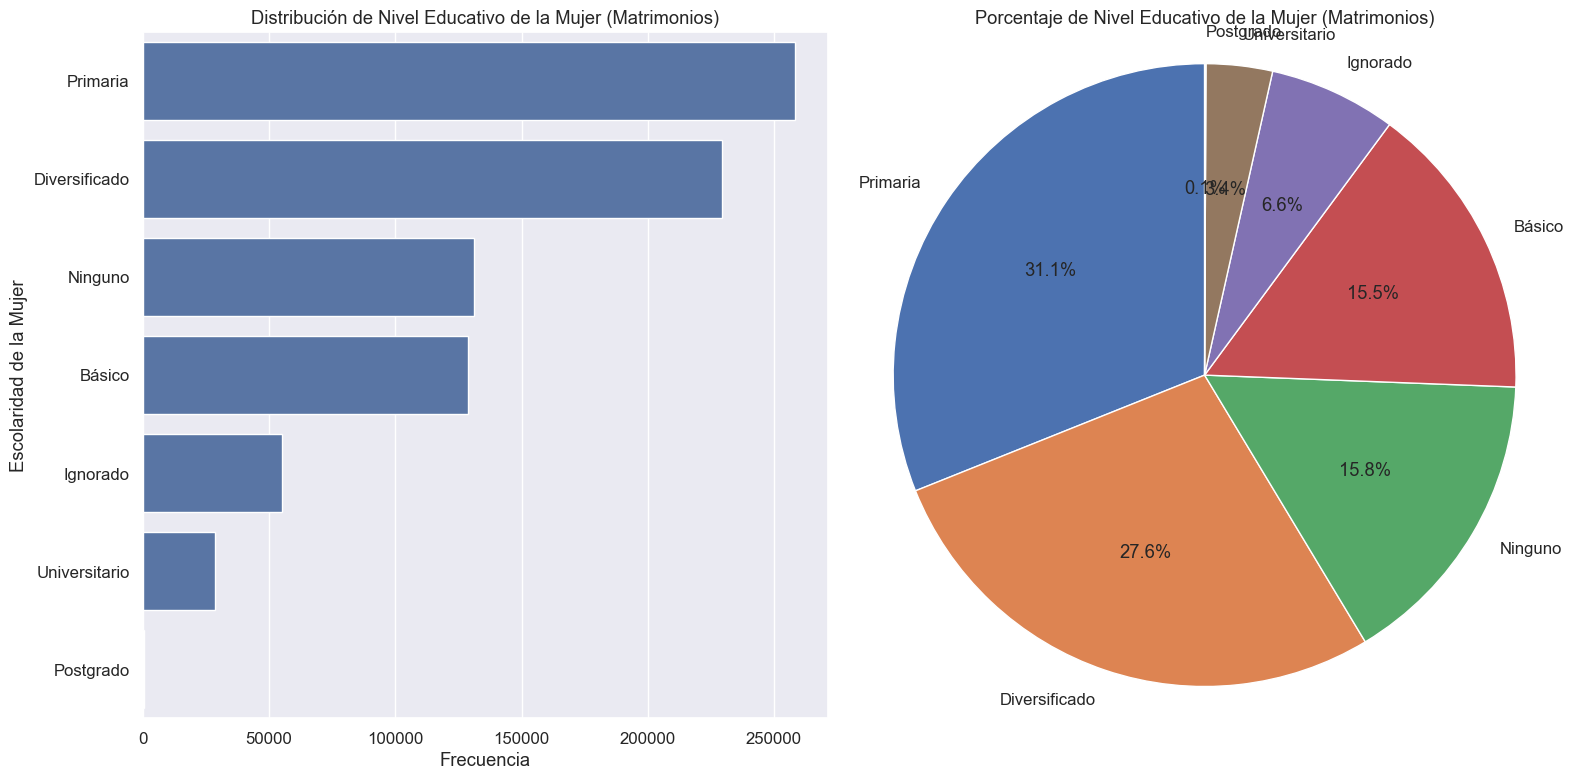


Tabla de Frecuencias - Área Geográfica (Matrimonios)
  Area Geografica de la Ocurrencia  Frecuencia  Porcentaje
0                           Urbano      286747       75.34
1                         Ignorado       47813       12.56
2                            Rural       46066       12.10


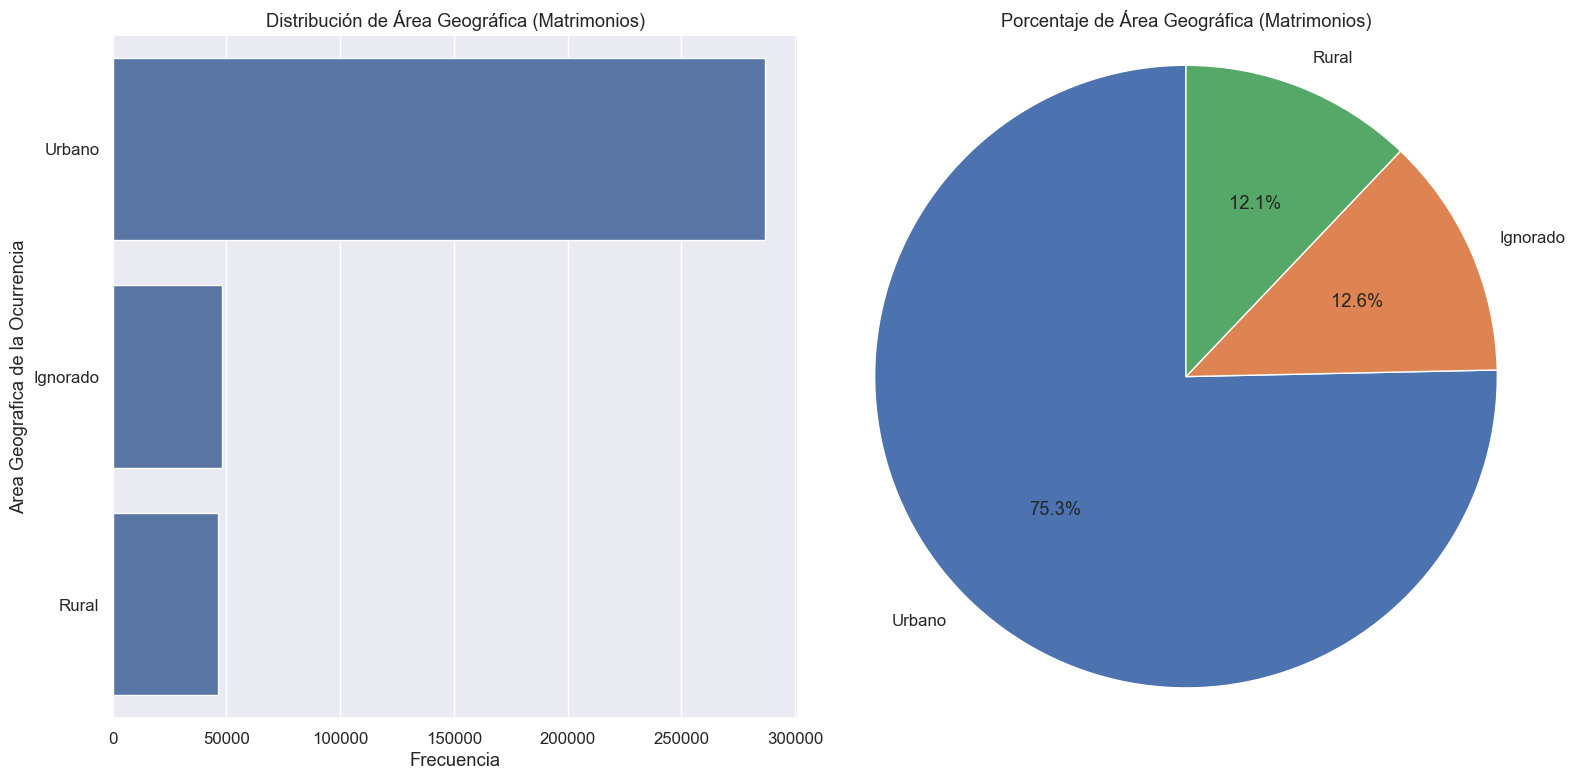


--- ANÁLISIS DE DIVORCIOS ---

Tabla de Frecuencias - Departamento de Registro (Divorcios)
   Departamento de Registro  Frecuencia  Porcentaje
0                 Guatemala       29160       38.03
1            Quetzaltenango        6546        8.54
2                 Escuintla        3369        4.39
3                San Marcos        3071        4.01
4                   Jutiapa        2732        3.56
5             Suchitepéquez        2696        3.52
6             Huehuetenango        2627        3.43
7                    Izabal        2361        3.08
8                Retalhuleu        2316        3.02
9                     Petén        2225        2.90
10                    Otros       19566       25.51


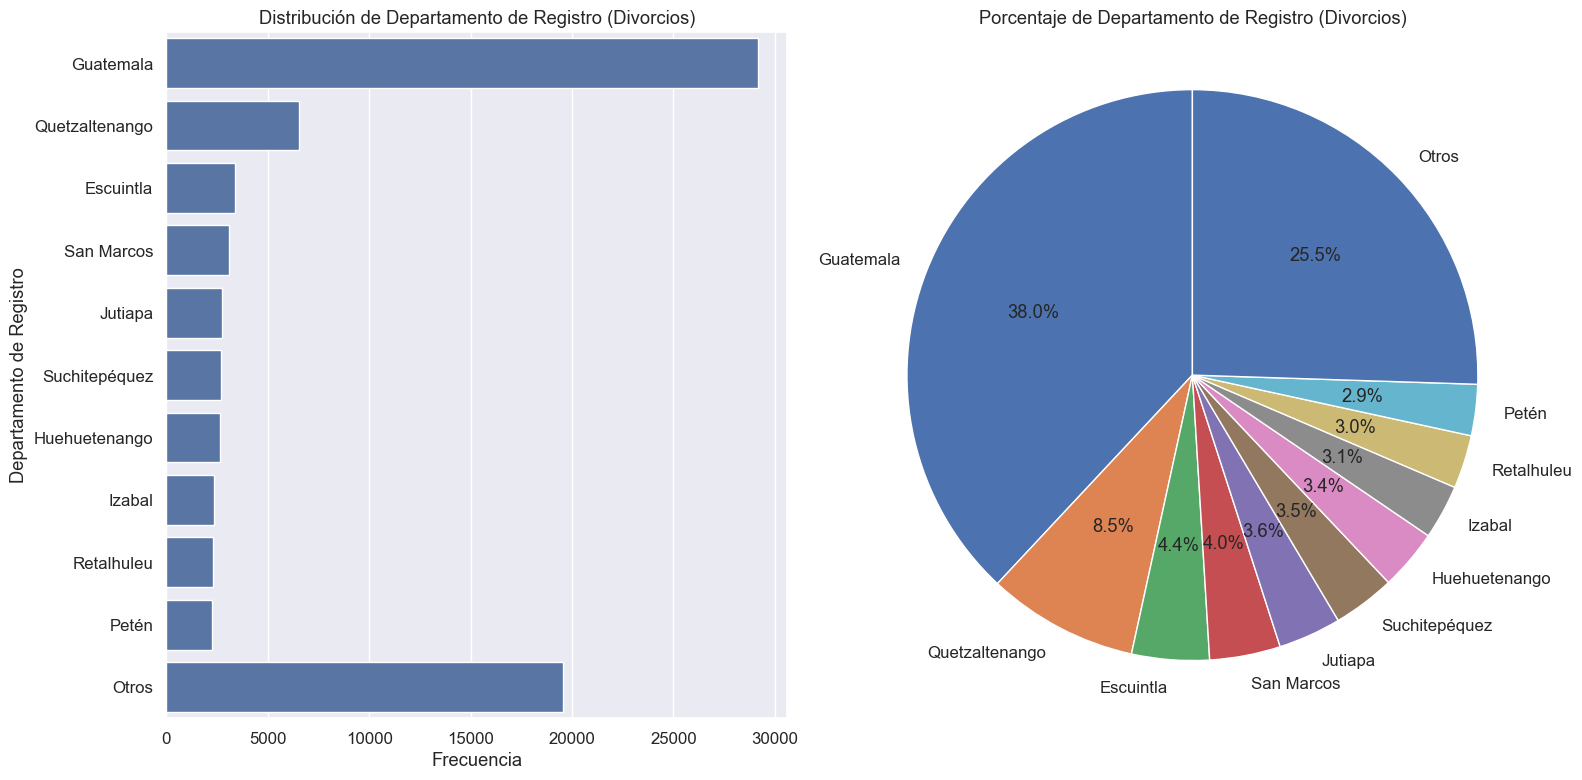


Tabla de Frecuencias - Pueblo de Pertenencia del Hombre (Divorcios)
  Pueblo de Pertenencia del Hombre  Frecuencia  Porcentaje
0                         Ignorado       37606       49.05
1                   Mestizo/Ladino       32369       42.22
2                             Maya        6047        7.89
3                             Otro         609        0.79
4                         Garífuna          26        0.03
5                            Xinka          12        0.02


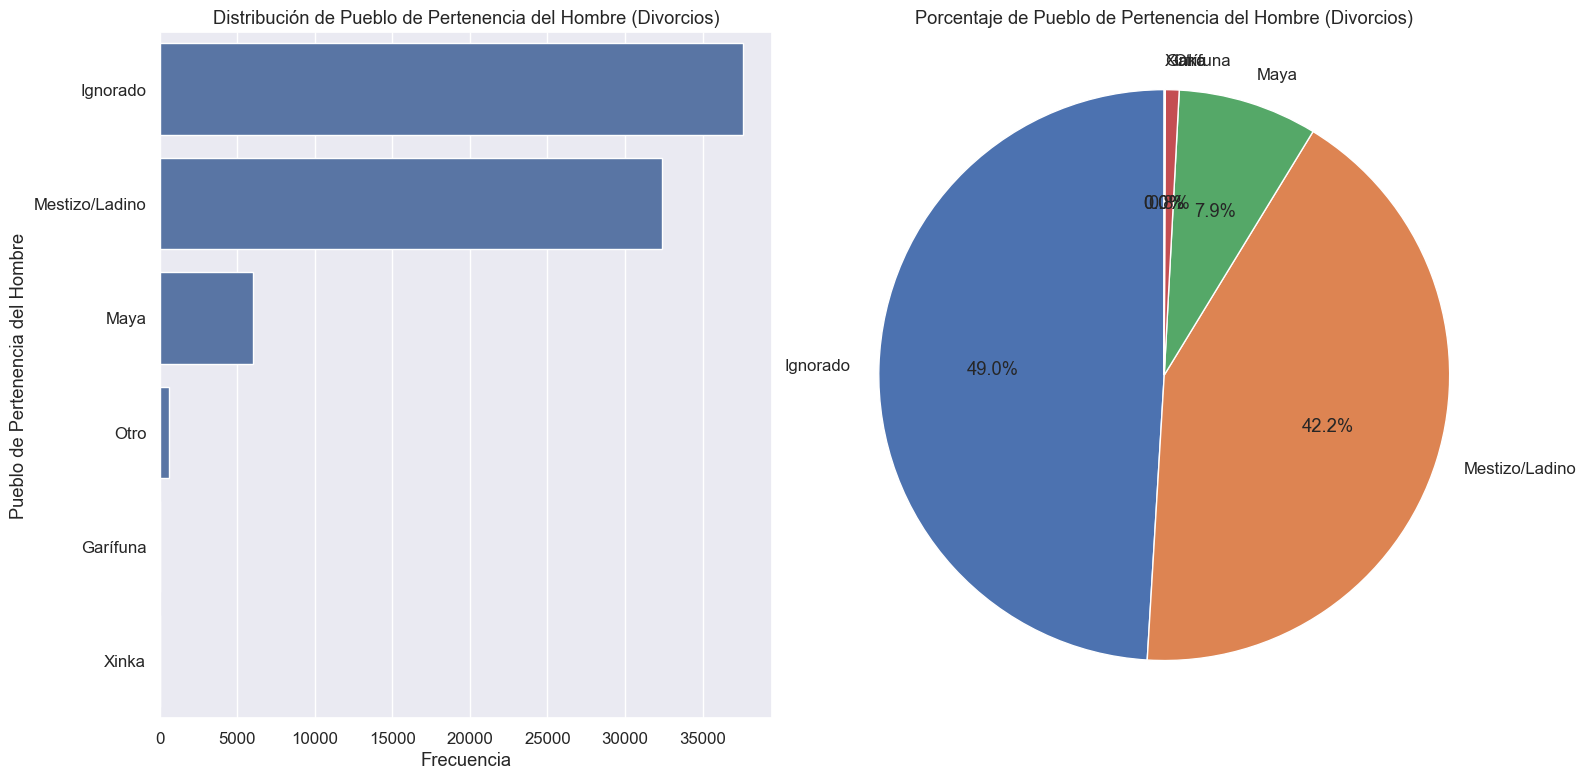


Tabla de Frecuencias - Nivel Educativo del Hombre (Divorcios)
  Escolaridad del Hombre  Frecuencia  Porcentaje
0               Ignorado       33234       43.61
1          Diversificado       15539       20.39
2                Ninguno        9016       11.83
3               Primaria        7668       10.06
4                 Básico        6214        8.15
5          Universitario        4384        5.75
6              Postgrado         157        0.21


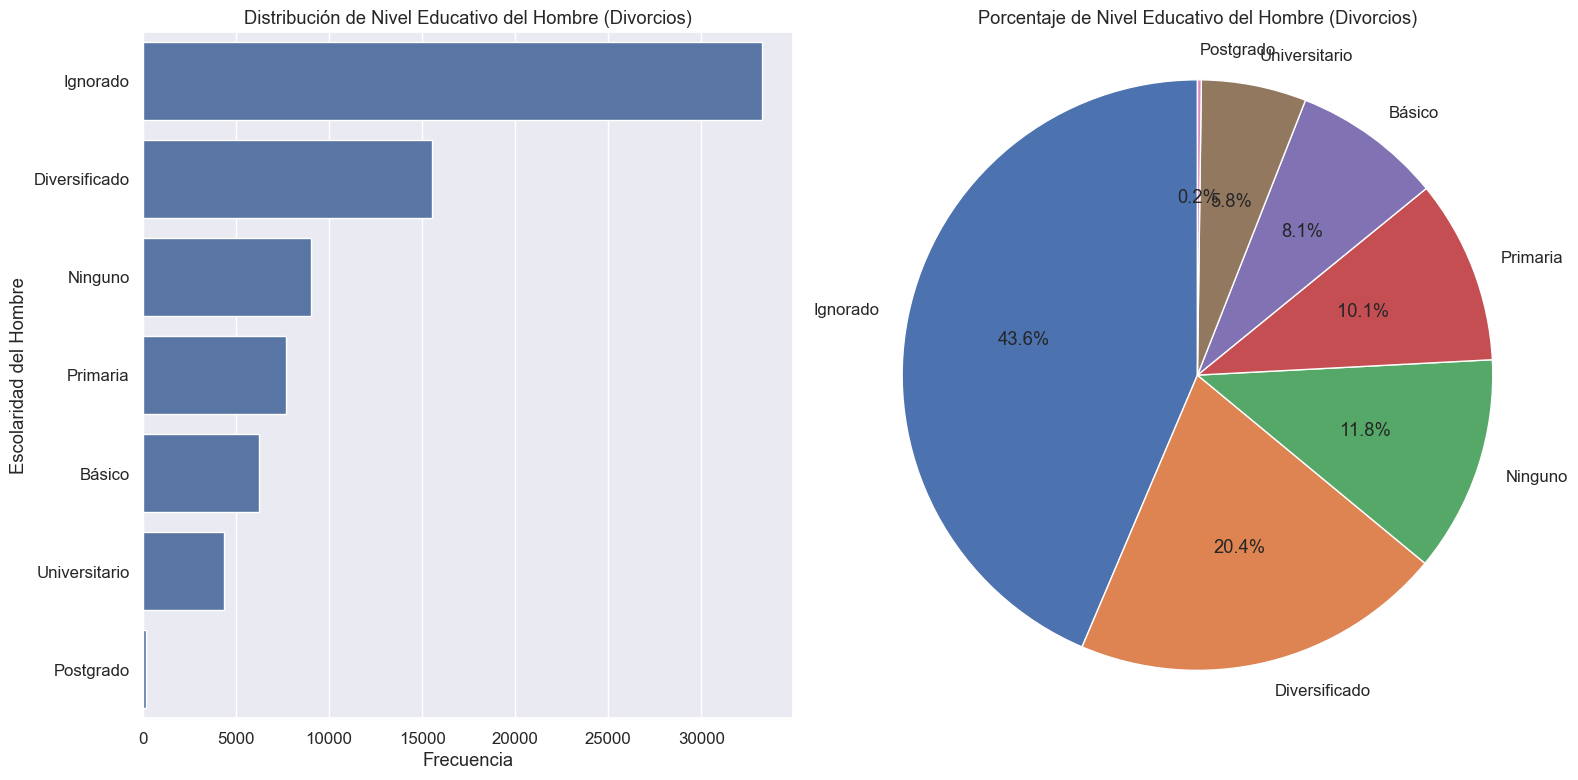


Tabla de Frecuencias - Nivel Educativo de la Mujer (Divorcios)
  Escolaridad de la Mujer  Frecuencia  Porcentaje
0                Ignorado       32856       43.16
1           Diversificado       16034       21.06
2                 Ninguno        9371       12.31
3                Primaria        7355        9.66
4                  Básico        6155        8.09
5           Universitario        4247        5.58
6               Postgrado         109        0.14


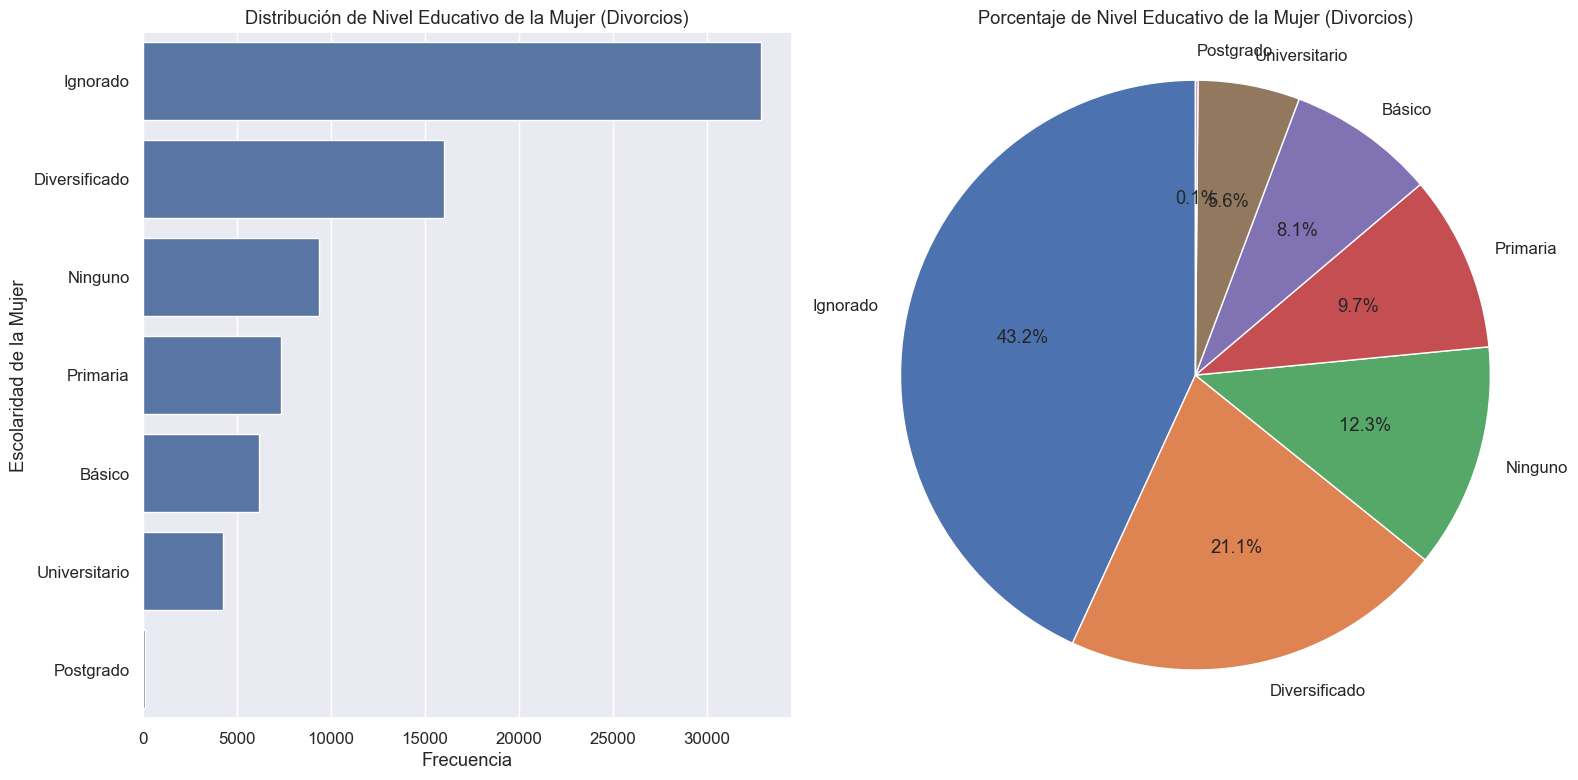

,Escolaridad de la Mujer,Frecuencia,Porcentaje
0,Ignorado,32856,43.16
1,Diversificado,16034,21.06
2,Ninguno,9371,12.31
3,Primaria,7355,9.66
4,Básico,6155,8.09
5,Universitario,4247,5.58
6,Postgrado,109,0.14


In [46]:
matrimonios = pd.read_csv('matrimonios_limpio.csv')
divorcios = pd.read_csv('divorcios_limpio.csv')
# Mapeo de códigos a valores legibles
dict_departamentos = {
    1: 'Guatemala', 2: 'El Progreso', 3: 'Sacatepéquez', 4: 'Chimaltenango',
    5: 'Escuintla', 6: 'Santa Rosa', 7: 'Sololá', 8: 'Totonicapán',
    9: 'Quetzaltenango', 10: 'Suchitepéquez', 11: 'Retalhuleu', 12: 'San Marcos',
    13: 'Huehuetenango', 14: 'Quiché', 15: 'Baja Verapaz', 16: 'Alta Verapaz',
    17: 'Petén', 18: 'Izabal', 19: 'Zacapa', 20: 'Chiquimula', 21: 'Jalapa',
    22: 'Jutiapa'
}

dict_pueblos = {
    1: 'Maya', 2: 'Garífuna', 3: 'Xinka', 4: 'Mestizo/Ladino', 5: 'Otro', 9: 'Ignorado'
}

dict_escolaridad = {
    1: 'Ninguno', 2: 'Primaria', 3: 'Básico', 4: 'Diversificado', 
    5: 'Universitario', 6: 'Postgrado', 9: 'Ignorado'
}

dict_area = {
    1: 'Urbano', 2: 'Rural', 9: 'Ignorado'
}

# Convertir códigos a nombres en los dataframes
for df in [matrimonios]:
    if 'Departamento de Registro' in df.columns:
        df['Departamento de Registro'] = df['Departamento de Registro'].map(dict_departamentos)
    if 'Departamento de Ocurrencia' in df.columns:
        df['Departamento de Ocurrencia'] = df['Departamento de Ocurrencia'].map(dict_departamentos)
    if 'Pueblo de Pertenencia del Hombre' in df.columns:
        df['Pueblo de Pertenencia del Hombre'] = df['Pueblo de Pertenencia del Hombre'].map(dict_pueblos)
    if 'Pueblo de Pertenencia de la Mujer' in df.columns:
        df['Pueblo de Pertenencia de la Mujer'] = df['Pueblo de Pertenencia de la Mujer'].map(dict_pueblos)
    if 'Escolaridad del Hombre' in df.columns:
        df['Escolaridad del Hombre'] = df['Escolaridad del Hombre'].map(dict_escolaridad)
    if 'Escolaridad de la Mujer' in df.columns:
        df['Escolaridad de la Mujer'] = df['Escolaridad de la Mujer'].map(dict_escolaridad)
    if 'Area Geografica de la Ocurrencia' in df.columns:
        df['Area Geografica de la Ocurrencia'] = df['Area Geografica de la Ocurrencia'].map(dict_area)

# Repetir el proceso para divorcios por separado
for df in [divorcios]:
    if 'Departamento de Registro' in df.columns:
        df['Departamento de Registro'] = df['Departamento de Registro'].map(dict_departamentos)
    if 'Departamento de Ocurrencia' in df.columns:
        df['Departamento de Ocurrencia'] = df['Departamento de Ocurrencia'].map(dict_departamentos)
    if 'Pueblo de Pertenencia del Hombre' in df.columns:
        df['Pueblo de Pertenencia del Hombre'] = df['Pueblo de Pertenencia del Hombre'].map(dict_pueblos)
    if 'Pueblo de Pertenencia de la Mujer' in df.columns:
        df['Pueblo de Pertenencia de la Mujer'] = df['Pueblo de Pertenencia de la Mujer'].map(dict_pueblos)
    if 'Escolaridad del Hombre' in df.columns:
        df['Escolaridad del Hombre'] = df['Escolaridad del Hombre'].map(dict_escolaridad)
    if 'Escolaridad de la Mujer' in df.columns:
        df['Escolaridad de la Mujer'] = df['Escolaridad de la Mujer'].map(dict_escolaridad)

# Función para generar tablas de frecuencia y visualizaciones
def analizar_frecuencias(df, variable, titulo, tipo_dataset, top_n=10):
    """
    Genera tablas de frecuencia y gráficos para una variable categórica
    """
    if variable not in df.columns:
        print(f"Variable {variable} no encontrada en el conjunto de datos")
        return
    
    # Crear tabla de frecuencias
    freq = df[variable].value_counts().reset_index()
    freq.columns = [variable, 'Frecuencia']
    freq['Porcentaje'] = (freq['Frecuencia'] / freq['Frecuencia'].sum() * 100).round(2)
    
    # Si hay demasiadas categorías, limitar a las top_n más frecuentes
    if len(freq) > top_n:
        otros = pd.DataFrame({
            variable: ['Otros'],
            'Frecuencia': [freq.iloc[top_n:]['Frecuencia'].sum()],
            'Porcentaje': [freq.iloc[top_n:]['Porcentaje'].sum()]
        })
        freq = pd.concat([freq.iloc[:top_n], otros], ignore_index=True)
    
    # Mostrar tabla de frecuencias
    print(f"\nTabla de Frecuencias - {titulo} ({tipo_dataset})")
    print(freq)
    
    # Crear visualizaciones
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Gráfico de barras
    sns.barplot(x='Frecuencia', y=variable, data=freq, ax=ax1)
    ax1.set_title(f'Distribución de {titulo} ({tipo_dataset})')
    ax1.set_xlabel('Frecuencia')
    ax1.set_ylabel(variable)
    
    # Gráfico circular
    ax2.pie(freq['Porcentaje'], labels=freq[variable], autopct='%1.1f%%', startangle=90)
    ax2.axis('equal')  # Para que el gráfico sea circular
    ax2.set_title(f'Porcentaje de {titulo} ({tipo_dataset})')
    
    plt.tight_layout()
    plt.savefig(f'./Gráficas/distribucion_{variable}_{tipo_dataset.lower()}.png')
    plt.show()
    
    return freq

# Análisis de matrimonios - ejecutar por separado
print("\n--- ANÁLISIS DE MATRIMONIOS ---")
analizar_frecuencias(matrimonios, 'Departamento de Registro', 'Departamento de Registro', 'Matrimonios')
analizar_frecuencias(matrimonios, 'Pueblo de Pertenencia del Hombre', 'Pueblo de Pertenencia del Hombre', 'Matrimonios')
analizar_frecuencias(matrimonios, 'Escolaridad del Hombre', 'Nivel Educativo del Hombre', 'Matrimonios')
analizar_frecuencias(matrimonios, 'Escolaridad de la Mujer', 'Nivel Educativo de la Mujer', 'Matrimonios')
analizar_frecuencias(matrimonios, 'Area Geografica de la Ocurrencia', 'Área Geográfica', 'Matrimonios')

# Análisis de divorcios - ejecutar por separado
print("\n--- ANÁLISIS DE DIVORCIOS ---")
analizar_frecuencias(divorcios, 'Departamento de Registro', 'Departamento de Registro', 'Divorcios')
analizar_frecuencias(divorcios, 'Pueblo de Pertenencia del Hombre', 'Pueblo de Pertenencia del Hombre', 'Divorcios')
analizar_frecuencias(divorcios, 'Escolaridad del Hombre', 'Nivel Educativo del Hombre', 'Divorcios')
analizar_frecuencias(divorcios, 'Escolaridad de la Mujer', 'Nivel Educativo de la Mujer', 'Divorcios')

C:\Users\villa\AppData\Local\Temp\ipykernel_21412\655649416.py:15: DtypeWarning: Columns (16,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  matrimonios = pd.read_csv('matrimonios_limpio.csv')
C:\Users\villa\AppData\Local\Temp\ipykernel_21412\655649416.py:16: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  divorcios = pd.read_csv('divorcios_limpio.csv')


=== GRÁFICAS DE OCUPACIÓN ===

Distribución de Ocupaciones de Hombres en Matrimonios:
                        Ocupación  Frecuencia  Porcentaje
0            Peones agropecuarios      212724       29.51
1                  Sin clasificar      166129       23.04
2                      Vendedores       59399        8.24
3                    Agricultores       53488        7.42
4                    Construcción       25857        3.59
5                    Contabilidad       20829        2.89
6   Profesionales de la enseñanza       19926        2.76
7                      Metalurgia       17078        2.37
8   Técnicos jurídicos y sociales       15854        2.20
9            Técnicos científicos       14463        2.01
10              Otras ocupaciones      115146       15.98


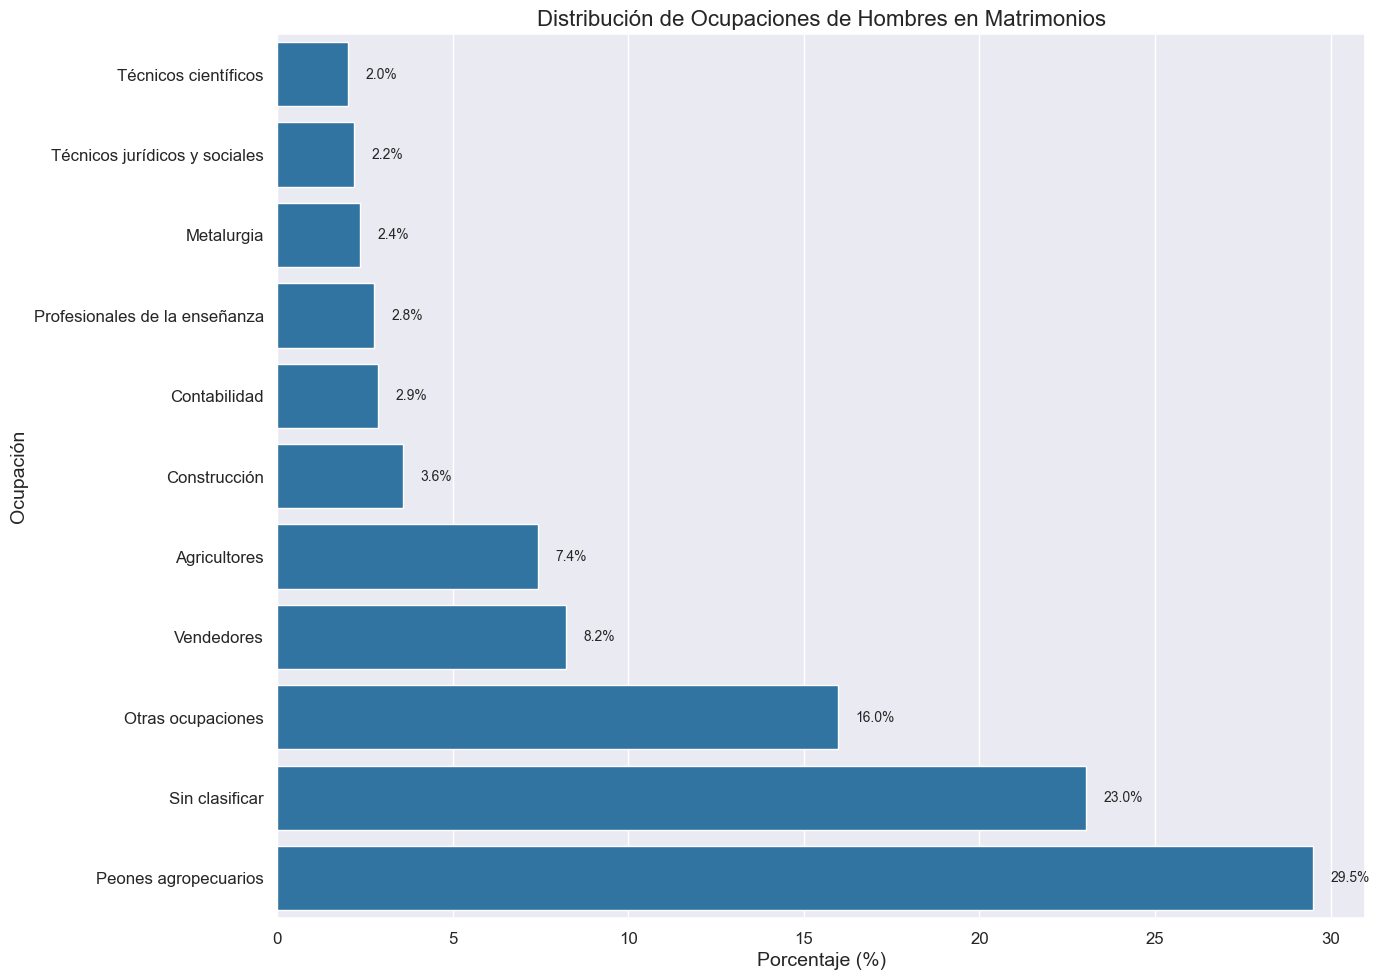

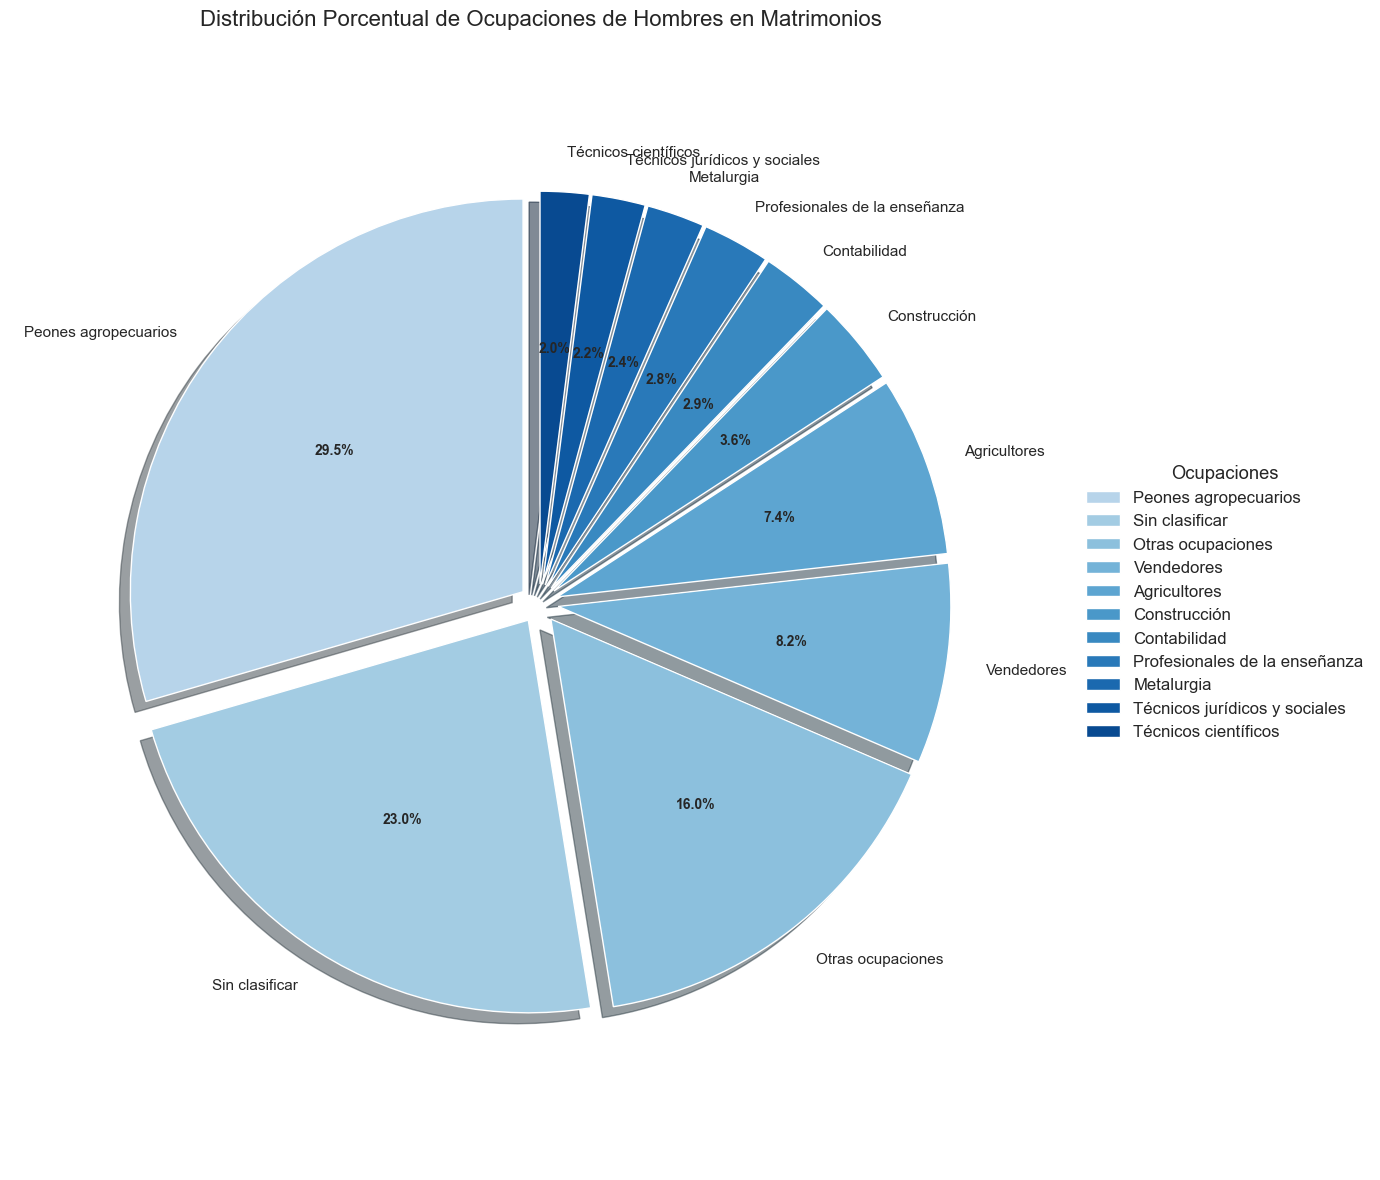


Distribución de Ocupaciones de Hombres en Divorcios:
                        Ocupación  Frecuencia  Porcentaje
0                  Sin clasificar       14887       22.72
1                        Ignorado       13550       20.68
2            Peones agropecuarios        8520       13.00
3                      Vendedores        4291        6.55
4                 No especificado        3317        5.06
5                    Contabilidad        2382        3.63
6   Profesionales de la enseñanza        1779        2.71
7                      Metalurgia        1652        2.52
8                     Conductores        1466        2.24
9                    Construcción        1459        2.23
10              Otras ocupaciones       12233       18.67


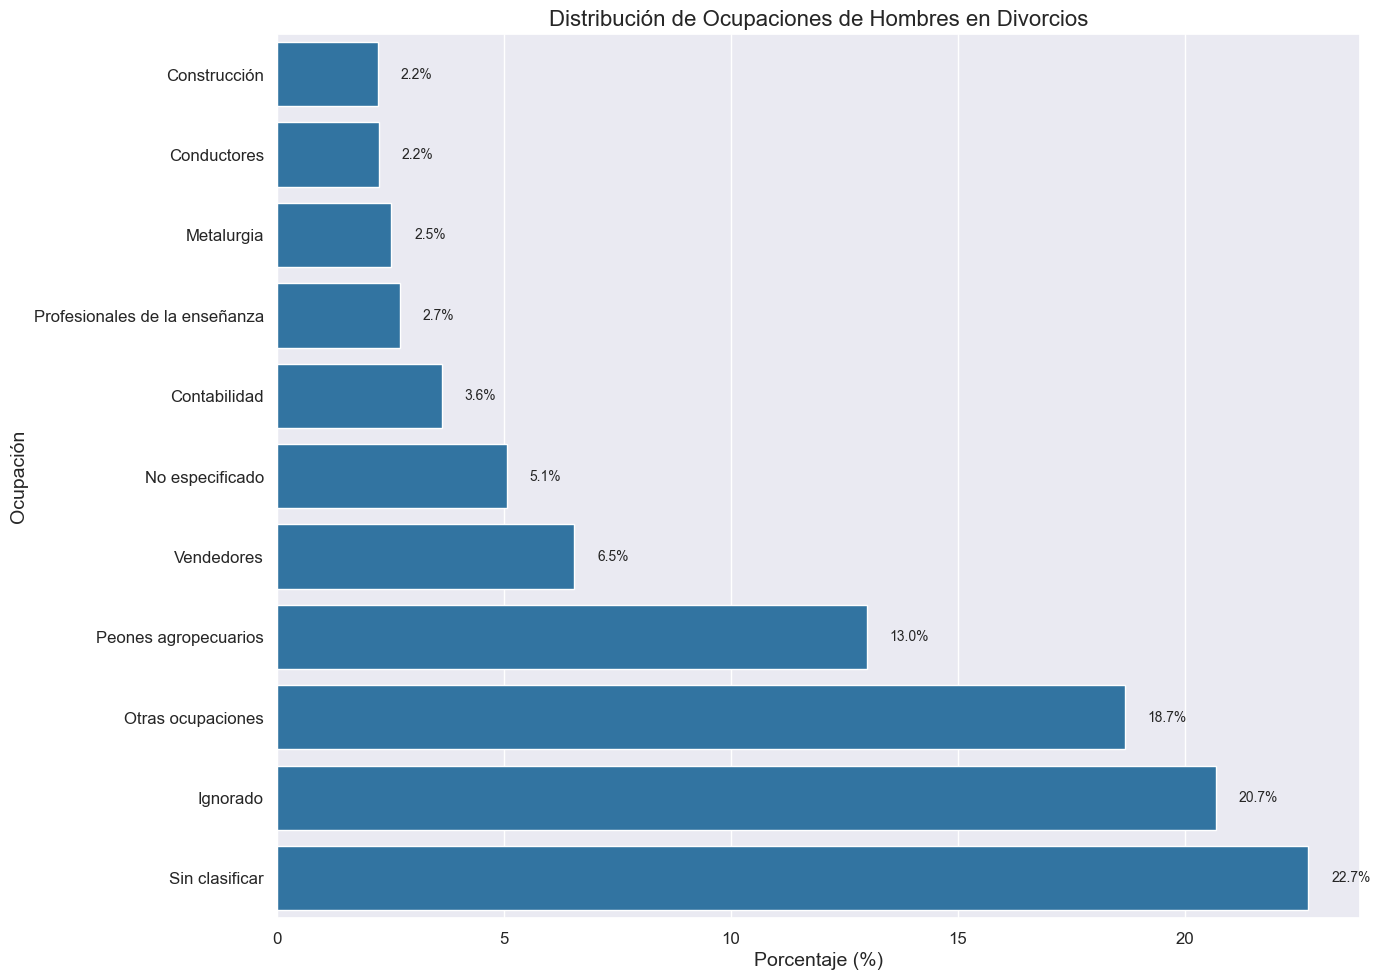

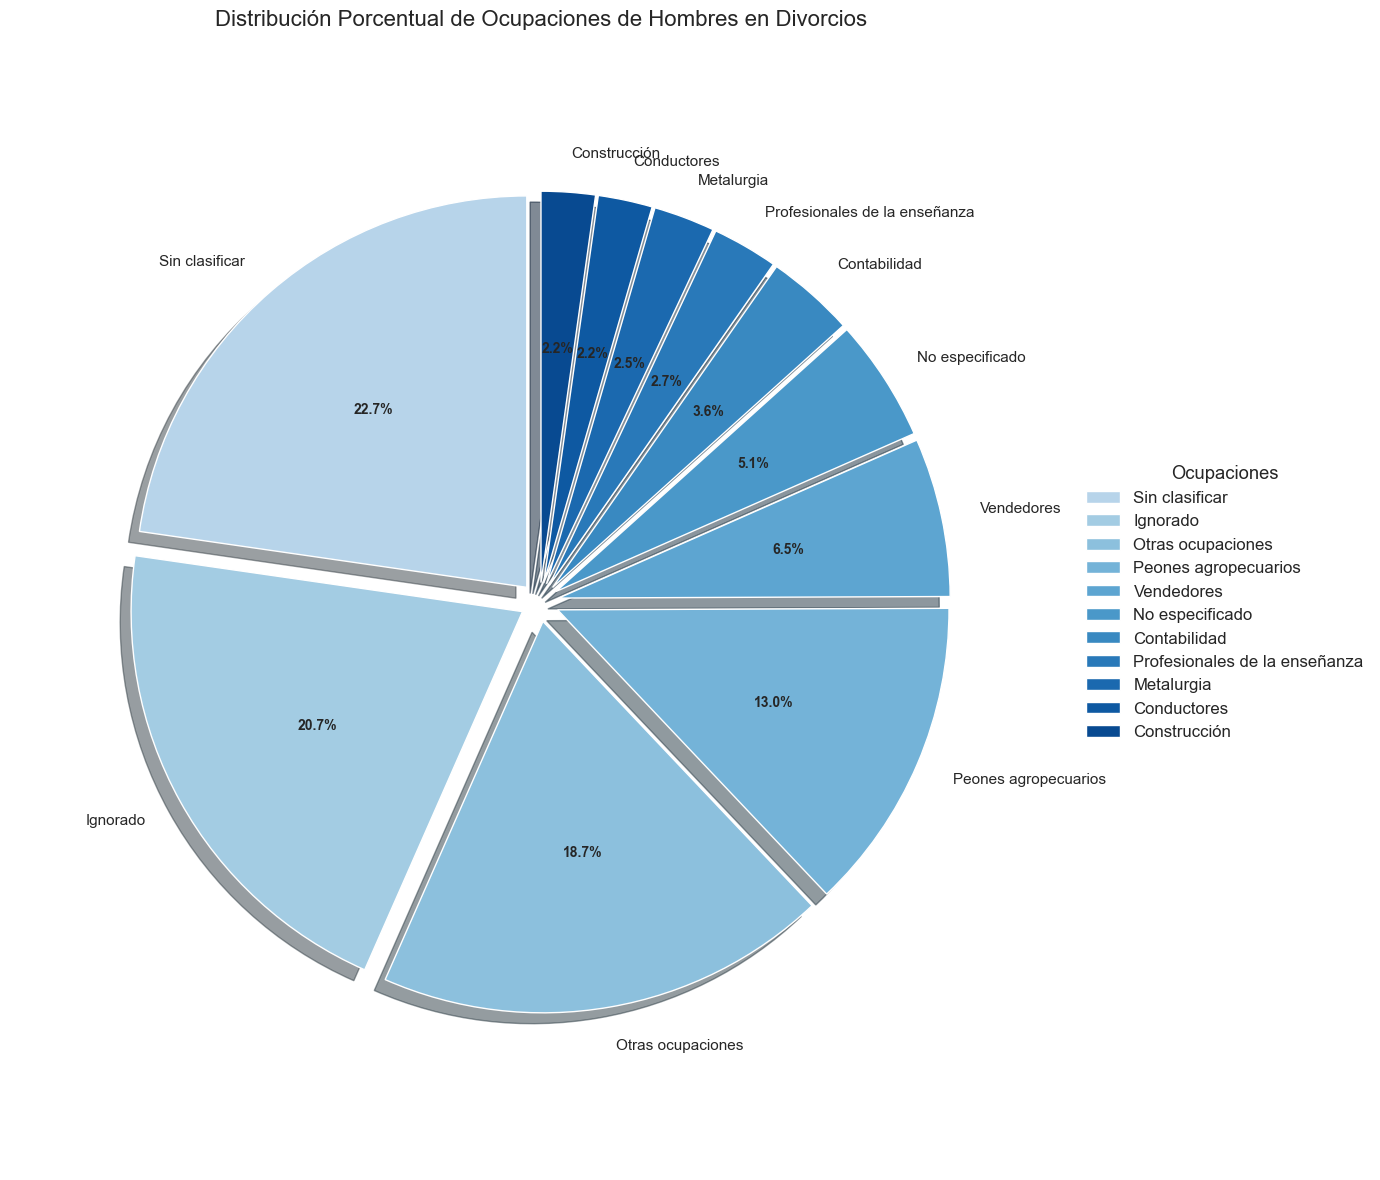

Columna Ocupacion del Mujer no encontrada en el conjunto de datos
Columna Ocupacion del Mujer no encontrada en el conjunto de datos


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar visualizaciones
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 12
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.1)

# Cargar los datos
# Cargar los datos
matrimonios = pd.read_csv('matrimonios_limpio.csv')
divorcios = pd.read_csv('divorcios_limpio.csv')

# Mapeo de códigos de ocupación a categorías más generales
# Basado en la Clasificación Internacional Uniforme de Ocupaciones (CIUO-08)
dict_ocupacion = {
    1: 'Fuerzas armadas',
    3: 'Fuerzas armadas',
    11: 'Directivos y ejecutivos',
    12: 'Directivos y ejecutivos',
    13: 'Directivos y ejecutivos',
    14: 'Directivos y ejecutivos',
    21: 'Profesionales científicos',
    22: 'Profesionales de la salud',
    23: 'Profesionales de la enseñanza',
    24: 'Profesionales empresariales',
    25: 'Profesionales de TI',
    26: 'Profesionales jurídicos y sociales',
    31: 'Técnicos científicos',
    32: 'Técnicos de salud',
    33: 'Técnicos financieros',
    34: 'Técnicos jurídicos y sociales',
    35: 'Técnicos de TI',
    41: 'Oficinistas',
    42: 'Atención al cliente',
    43: 'Contabilidad',
    44: 'Apoyo administrativo',
    51: 'Servicios personales',
    52: 'Vendedores',
    53: 'Cuidados personales',
    54: 'Servicios de protección',
    61: 'Agricultores',
    62: 'Trabajadores forestales',
    71: 'Construcción',
    72: 'Metalurgia',
    73: 'Artesanos',
    74: 'Electricistas',
    75: 'Procesamiento de alimentos',
    81: 'Operadores de máquinas',
    82: 'Ensambladores',
    83: 'Conductores',
    91: 'Limpiadores',
    92: 'Peones agropecuarios',
    93: 'Peones de minería',
    94: 'Ayudantes de cocina',
    95: 'Vendedores ambulantes',
    96: 'Recolectores de desechos',
    97: 'Sin clasificar',
    98: 'No especificado',
    99: 'Ignorado'
}

# Aplicar mapeo de ocupación a ambos dataframes
for df in [matrimonios, divorcios]:
    if 'Ocupacion del Hombre' in df.columns:
        df['Ocupacion del Hombre'] = df['Ocupacion del Hombre'].map(dict_ocupacion)
    if 'Ocupacion de la Mujer' in df.columns:
        df['Ocupacion de la Mujer'] = df['Ocupacion de la Mujer'].map(dict_ocupacion)

# Función para generar gráficas de ocupación
def graficar_ocupacion(df, genero, tipo_dataset, top_n=10):
    """
    Genera una gráfica de ocupación para un género específico
    
    Parámetros:
    df: DataFrame con los datos
    genero: 'Hombre' o 'Mujer'
    tipo_dataset: 'Matrimonios' o 'Divorcios'
    top_n: Número de ocupaciones más frecuentes a mostrar
    """
    # Definir la columna a analizar según el género
    columna = f'Ocupacion del {genero}'
    
    # Verificar que la columna exista
    if columna not in df.columns:
        print(f"Columna {columna} no encontrada en el conjunto de datos")
        return
    
    # Crear tabla de frecuencias
    freq = df[columna].value_counts().reset_index()
    freq.columns = ['Ocupación', 'Frecuencia']
    freq['Porcentaje'] = (freq['Frecuencia'] / freq['Frecuencia'].sum() * 100).round(2)
    
    # Limitar a las top_n ocupaciones más frecuentes
    if len(freq) > top_n:
        # Crear una fila para "Otras ocupaciones"
        otras = pd.DataFrame({
            'Ocupación': ['Otras ocupaciones'],
            'Frecuencia': [freq.iloc[top_n:]['Frecuencia'].sum()],
            'Porcentaje': [freq.iloc[top_n:]['Porcentaje'].sum().round(2)]
        })
        
        # Combinar las top_n ocupaciones con la categoría "Otras"
        freq = pd.concat([freq.iloc[:top_n], otras], ignore_index=True)
    
    # Mostrar resultados
    print(f"\nDistribución de Ocupaciones de {genero}s en {tipo_dataset}:")
    print(freq)
    
    # Crear visualización: Gráfico de barras horizontales
    plt.figure(figsize=(14, 10))
    
    # Usar diferentes colores según el género
    color = '#1f77b4' if genero == 'Hombre' else '#ff7f0e'  # Azul para hombres, naranja para mujeres
    
    # Ordenar por frecuencia para mejor visualización
    freq = freq.sort_values('Frecuencia', ascending=True)
    
    ax = sns.barplot(
        y='Ocupación', 
        x='Porcentaje', 
        data=freq,
        color=color
    )
    
    plt.title(f'Distribución de Ocupaciones de {genero}s en {tipo_dataset}', fontsize=16)
    plt.ylabel('Ocupación', fontsize=14)
    plt.xlabel('Porcentaje (%)', fontsize=14)
    
    # Añadir etiquetas de porcentaje en las barras
    for p in ax.patches:
        width = p.get_width()
        plt.text(width + 0.5, p.get_y() + p.get_height()/2.,
                f'{width:.1f}%', ha="left", va="center", fontsize=10)
    
    plt.tight_layout()
    plt.savefig(f'./Gráficas/ocupacion_{genero.lower()}s_{tipo_dataset.lower()}.png', dpi=300)
    plt.show()
    
    # Crear visualización: Gráfico circular
    plt.figure(figsize=(14, 12))
    
    # Para mejorar la legibilidad del gráfico circular, ordenamos por porcentaje
    freq = freq.sort_values('Porcentaje', ascending=False)
    
    # Elegir una paleta de colores según el género
    colores = plt.cm.Blues(np.linspace(0.3, 0.9, len(freq))) if genero == 'Hombre' else plt.cm.Oranges(np.linspace(0.3, 0.9, len(freq)))
    
    wedges, texts, autotexts = plt.pie(
        freq['Porcentaje'],
        labels=freq['Ocupación'],
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        colors=colores,
        # Separar ligeramente las piezas para mejor visualización
        explode=[0.05] * len(freq)
    )
    
    # Ajustar el tamaño del texto para que sea legible
    plt.setp(texts, size=11)
    plt.setp(autotexts, size=10, weight="bold")
    
    plt.title(f'Distribución Porcentual de Ocupaciones de {genero}s en {tipo_dataset}', fontsize=16)
    plt.axis('equal')  # Para que el gráfico sea circular
    
    # Añadir leyenda para mejorar la legibilidad
    plt.legend(
        wedges,
        freq['Ocupación'],
        title="Ocupaciones",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1)
    )
    
    plt.tight_layout()
    plt.savefig(f'./Gráficas/ocupacion_{genero.lower()}s_{tipo_dataset.lower()}_pie.png', dpi=300)
    plt.show()
    
    return freq

# Generar las cuatro gráficas solicitadas
print("=== GRÁFICAS DE OCUPACIÓN ===")

# 1. Ocupación de Hombres en Matrimonios
ocupacion_hombres_matrimonios = graficar_ocupacion(matrimonios, 'Hombre', 'Matrimonios')

# 2. Ocupación de Hombres en Divorcios
ocupacion_hombres_divorcios = graficar_ocupacion(divorcios, 'Hombre', 'Divorcios')

# 3. Ocupación de Mujeres en Matrimonios
ocupacion_mujeres_matrimonios = graficar_ocupacion(matrimonios, 'Mujer', 'Matrimonios')

# 4. Ocupación de Mujeres en Divorcios
ocupacion_mujeres_divorcios = graficar_ocupacion(divorcios, 'Mujer', 'Divorcios')